In [ ]:
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
from scipy import special, stats
import numpy as np
random_seed = 730612
cores = 4
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import graphviz
import os
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


print('Libraries imported')

Libraries imported


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic (3).csv


In [ ]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
# changing obestiy column to 1 (obese) or 0 (not)
def categorize_weight(weight_class):
    if 'Obesity' in weight_class: #or 'Overweight' in weight_class:
        return 1
    else:
        return 0

df['NObeyesdad'] = df['NObeyesdad'].apply(categorize_weight)

# Exploratory Data Analysis

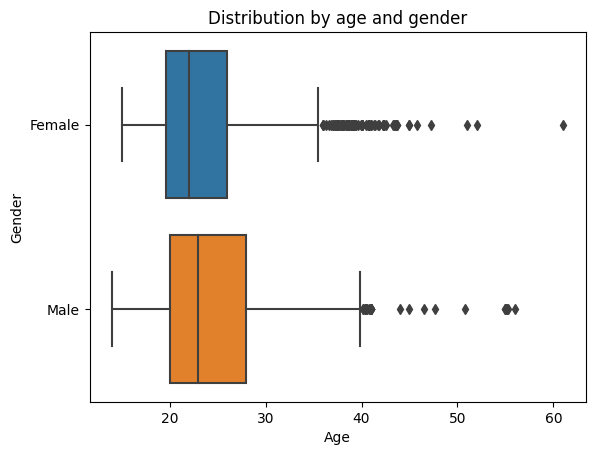

In [ ]:
sns.boxplot(y = df["Gender"], x= df["Age"])
plt.title("Distribution by age and gender")
plt.show()

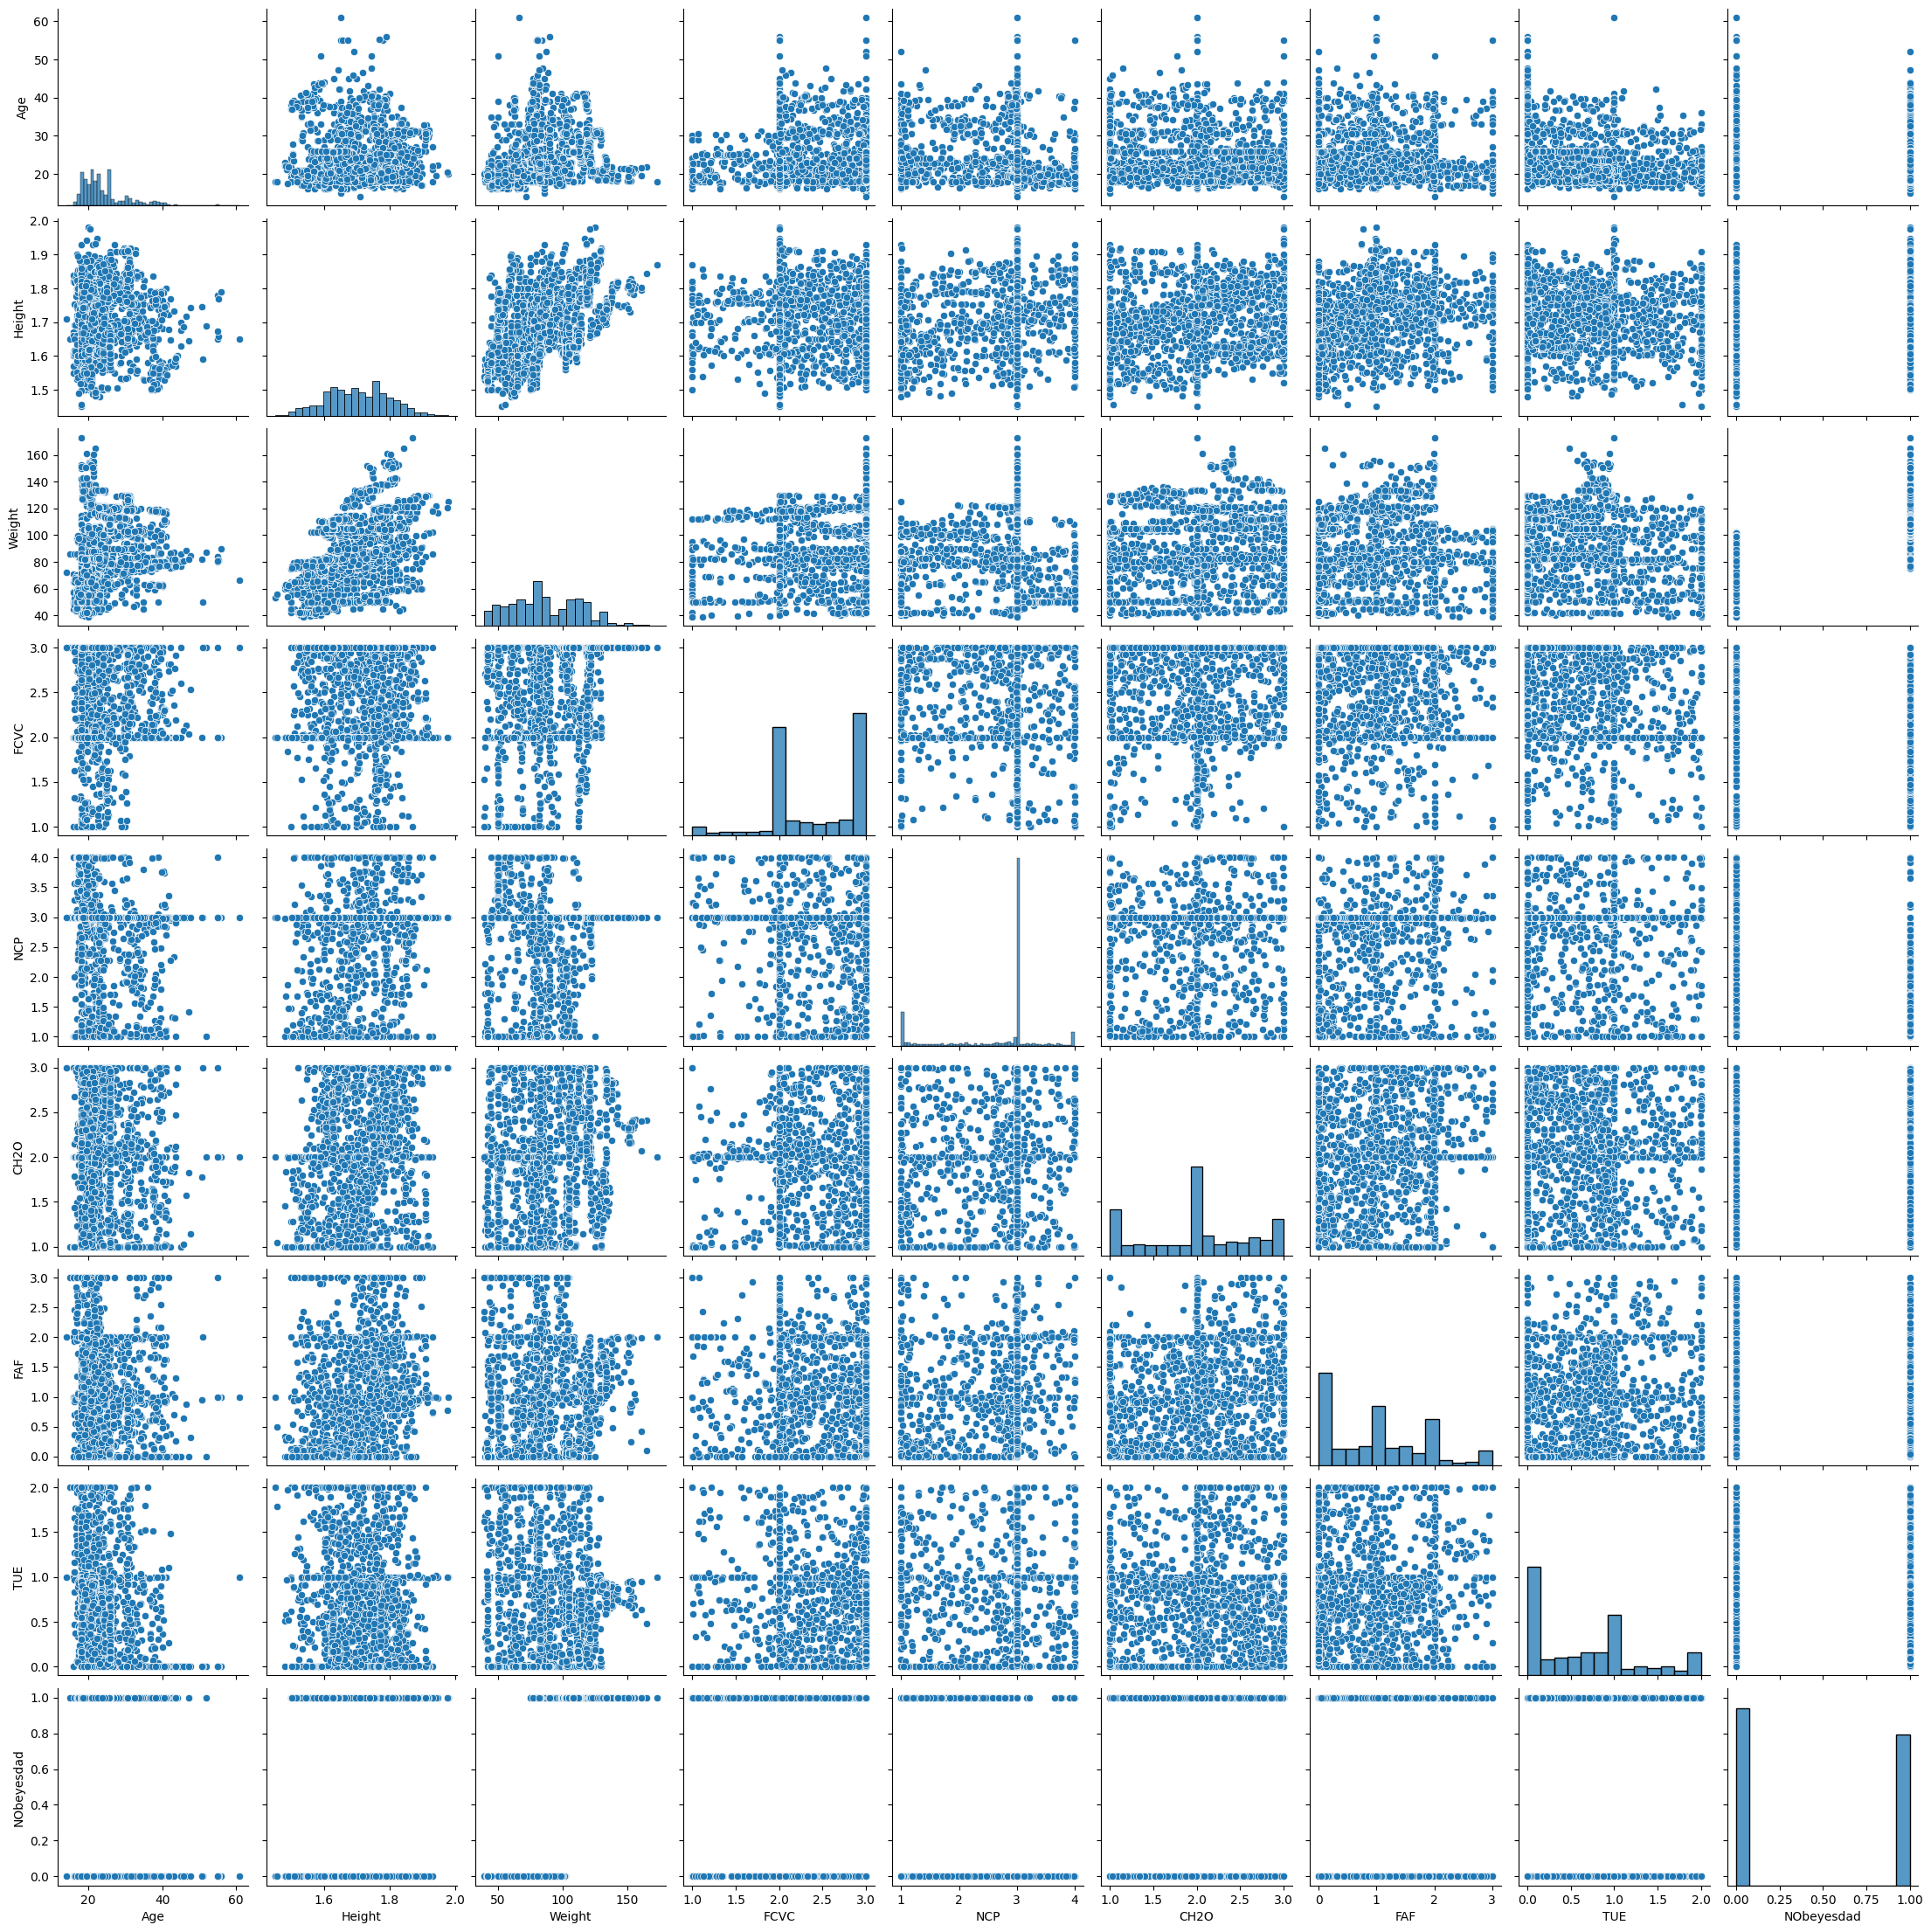

In [ ]:
sns.pairplot(df)

<ipython-input-7-ab7b9997ee69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


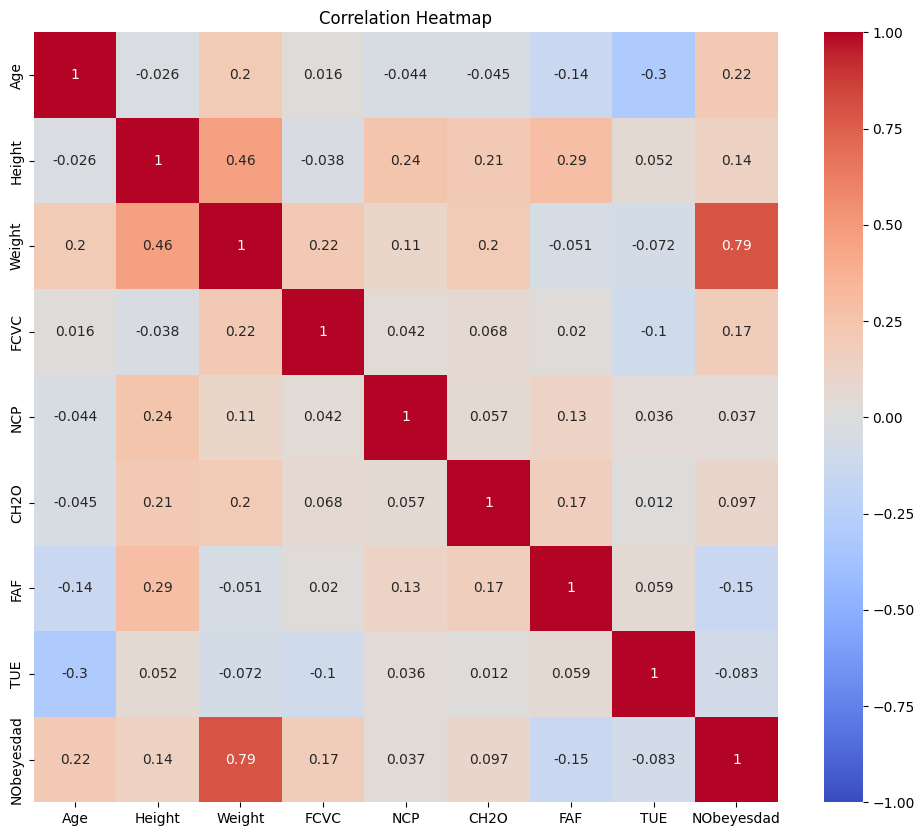

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing the Data

In [ ]:
# changing columns to 0 (no) or 1 (yes)
def categorize_column(class0):
    if 'no' in class0:
        return 0
    else:
        return 1
df['CAEC'] = df['CAEC'].apply(categorize_column)
df['CALC'] = df['CALC'].apply(categorize_column)

df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Dropping transportation column, not enough variation in the responses
df = df.drop('MTRANS', axis=1)

In [ ]:
# Standardizing numerical cols (z-score)
categorical_cols = ['Gender','CAEC','CALC']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for i in numerical_cols:
    mean = df[i].mean()
    sd = df[i].std()
    df[i] = (df[i]-mean)/sd

# Splitting data (train and test)

In [ ]:
# Splitting the data to predictors and response
X_total = df.drop(columns=['NObeyesdad'])
Y_total = df['NObeyesdad'].to_numpy()

In [ ]:
# Splitting the data to train (X) and test(X_test)
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=42)



```
# This is formatted as code
```

# Model 1 - no Height or Weight
called glm_model2

In [ ]:
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=42)

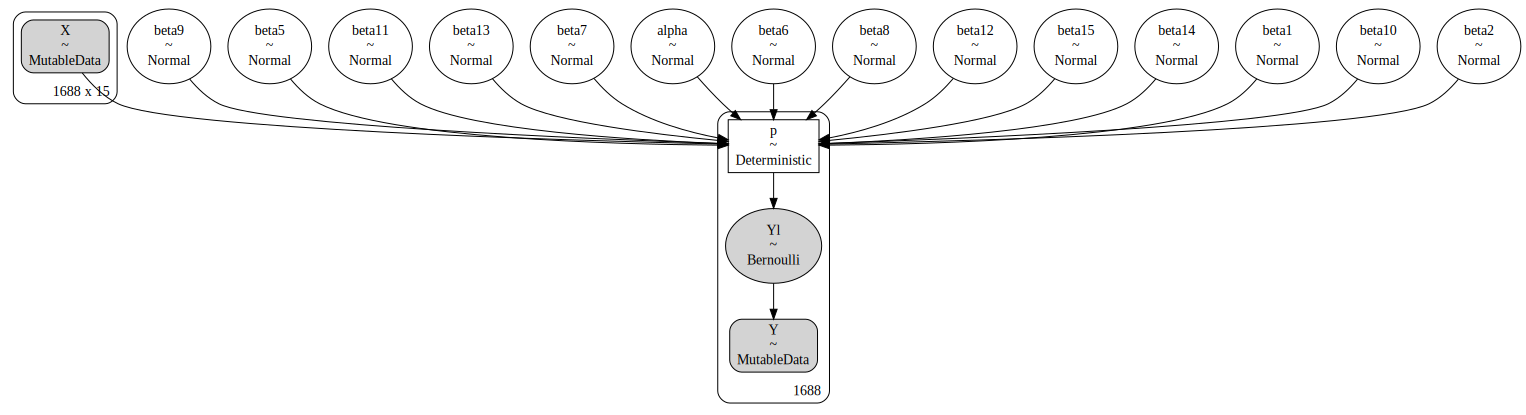

In [ ]:
# Model 1
with pm.Model() as glm_model2:

    X = pm.MutableData("X", X)
    Y = pm.MutableData("Y", Y)

    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10) # Gender
    beta2 = pm.Normal('beta2', mu=0, sigma=10) # Age
    #beta3 = pm.Normal('beta3', mu=0, sigma=10) # Height
    #beta4 = pm.Normal('beta4', mu=0, sigma=10) # Weight
    beta5 = pm.Normal('beta5', mu=0, sigma=10) # Fam History
    beta6 = pm.Normal('beta6', mu=0, sigma=10) # FAVC
    beta7 = pm.Normal('beta7', mu=0, sigma=10) # FCVC
    beta8 = pm.Normal('beta8', mu=0, sigma=10) # NCP
    beta9 = pm.Normal('beta9', mu=0, sigma=10) # CAEC
    beta10 = pm.Normal('beta10', mu=0, sigma=10) # SMOKE
    beta11 = pm.Normal('beta11', mu=0, sigma=10) # CH2O
    beta12 = pm.Normal('beta12', mu=0, sigma=10) # SCC
    beta13 = pm.Normal('beta13', mu=0, sigma=10) # FAF
    beta14 = pm.Normal('beta14', mu=0, sigma=10) # TUE
    beta15 = pm.Normal('beta15', mu=0, sigma=10) # CALC

    mu = alpha+beta1*X[:,0]+beta2*X[:,1]+beta5*X[:,4]+beta6*X[:,5]+beta7*X[:,6]+beta8*X[:,7]+beta9*X[:,8]+beta10*X[:,9]+beta11*X[:,10]+beta12*X[:,11]+beta13*X[:,12]+beta14*X[:,13]+beta15*X[:,14]
    p = pm.Deterministic('p', pm.invlogit(mu))
    Yl = pm.Bernoulli('Yl', p=p, observed=Y)

pm.model_to_graphviz(glm_model2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


<Axes: >

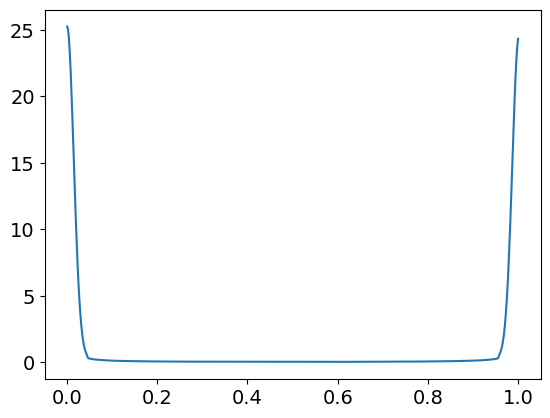

In [ ]:
glm_pp2 = pm.sample_prior_predictive(samples = 500, model=glm_model2, random_seed=random_seed)
az.plot_dist(glm_pp2.prior['p'])
# Distribution looks good below

## Advi sampling 2

In [ ]:
with glm_model2:
    advi_fit2 = pm.fit(method='advi', n=50000, random_seed=random_seed)

advi_trace2 = advi_fit2.sample(1000)
glm_trace_advi2 = pm.to_inference_data(trace=advi_trace2, model=glm_model2, log_likelihood=True)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta5'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta6'}>],
       [<Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta7'}>],
       [<Axes: title={'center': 'beta8'}>,
        <Axes: title={'center': 'beta8'}>],
       [<Axes: title={'center': 'beta9'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta10'}>,
        <Axes: title={'center': 'beta10'}>],
       [<Axes: title={'center': 'beta11'}>,
        <Axes: title={'center': 'beta11'}>],
       [<Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta12'}>],
       [<Axes: title={'center': 'beta

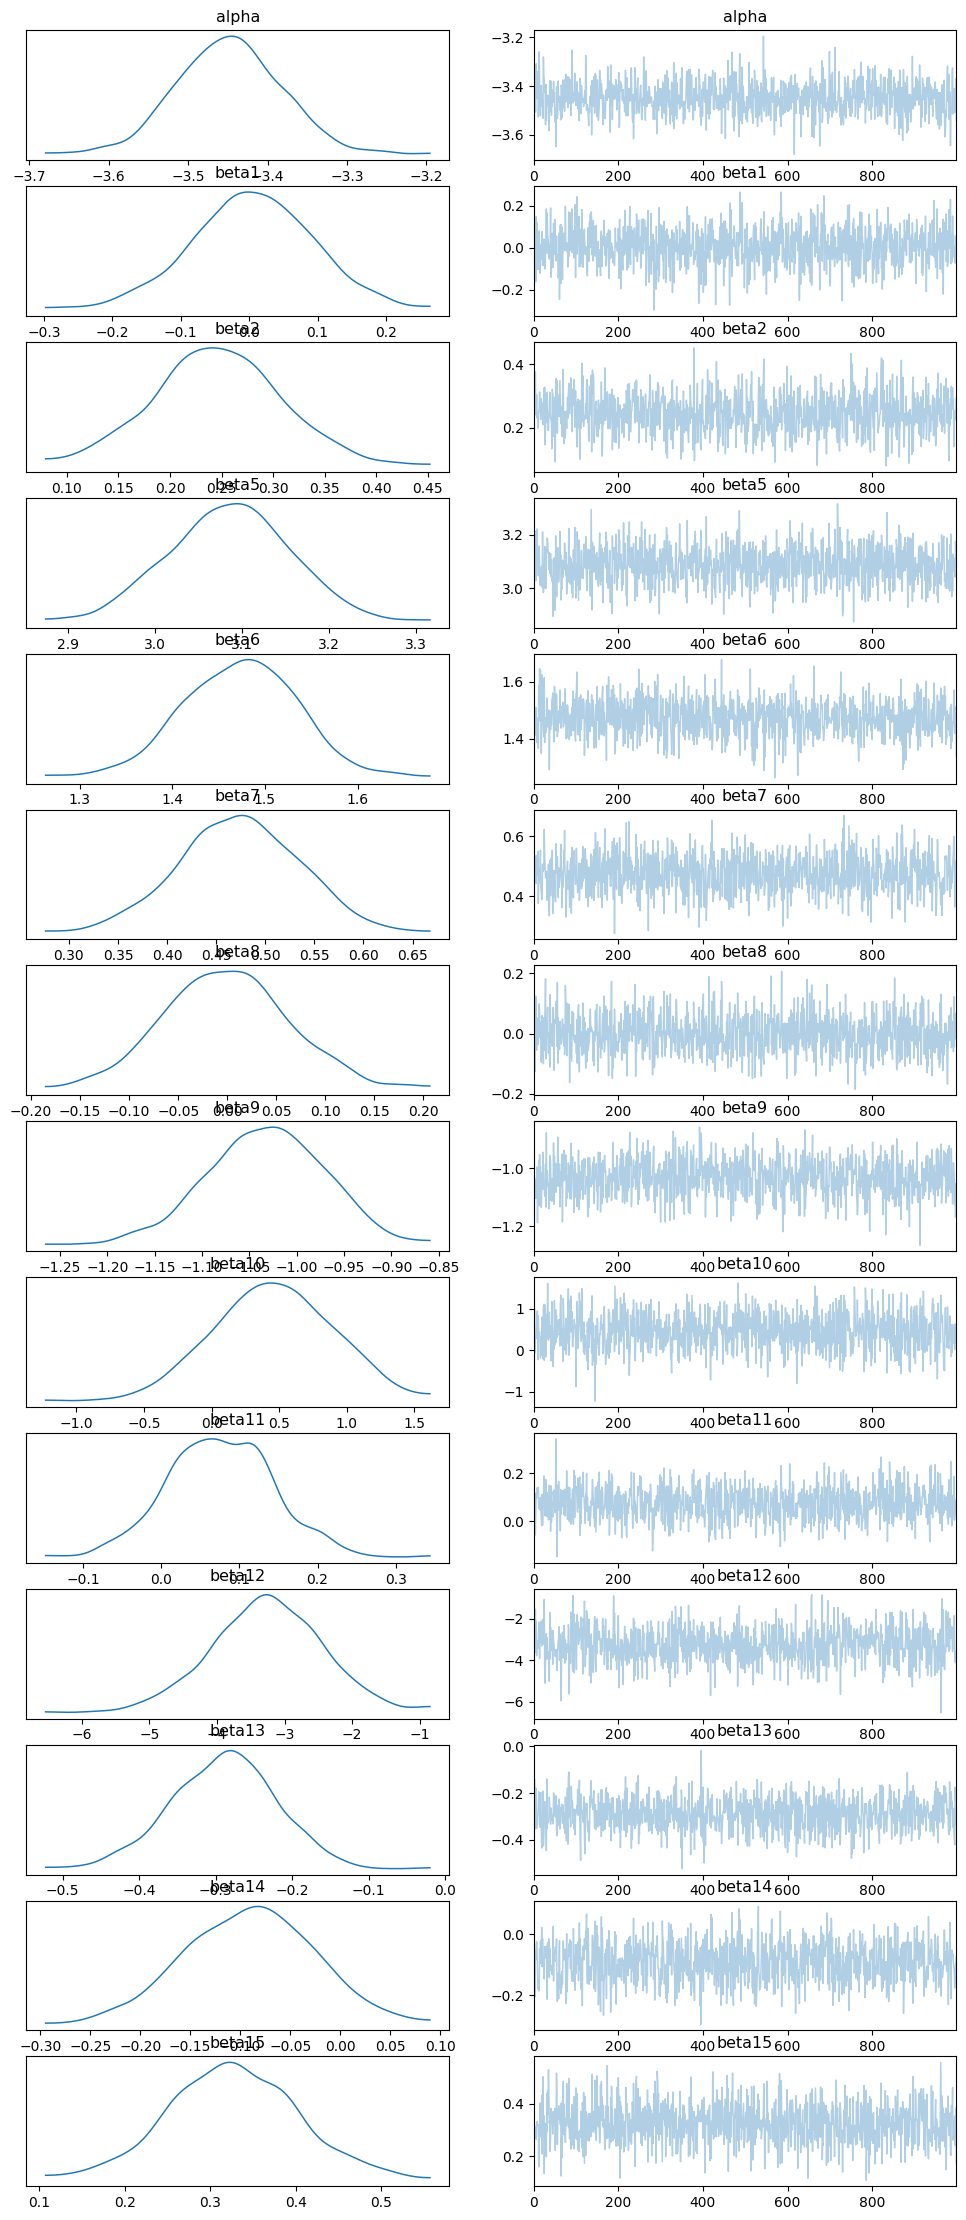

In [ ]:
az.plot_trace(glm_trace_advi2,
              var_names= ['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                          'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15'])

# trace plots look good (fuzzy caterpillar distribution)

In [ ]:
az.summary(glm_trace_advi2,
           var_names = ['alpha', 'beta1', 'beta2', 'beta5','beta6', 'beta7', 'beta8',
                        'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15'])
# ESS values greater than 400

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  -3.449  0.066  -3.562   -3.324      0.002    0.001    1002.0     981.0   
beta1   0.004  0.090  -0.171    0.170      0.003    0.002    1010.0     799.0   
beta2   0.246  0.062   0.137    0.370      0.002    0.001     908.0     904.0   
beta5   3.086  0.069   2.945    3.203      0.002    0.002    1049.0    1021.0   
beta6   1.473  0.062   1.366    1.594      0.002    0.001    1018.0     823.0   
beta7   0.474  0.062   0.356    0.587      0.002    0.001    1008.0     911.0   
beta8  -0.000  0.064  -0.115    0.124      0.002    0.001    1065.0     983.0   
beta9  -1.033  0.062  -1.141   -0.910      0.002    0.001    1079.0     983.0   
beta10  0.456  0.439  -0.346    1.247      0.014    0.010    1004.0    1005.0   
beta11  0.075  0.066  -0.044    0.205      0.002    0.001    1025.0     834.0   
beta12 -3.258  0.825  -4.812   -1.689      0.026    0.019     978.0     854.0   
beta13 -0.290  0.067  -0.421   -0.168      0.002    0.001    1055.0     742.0   
beta14 -0.091  0.064  -0.203    0.039      0.002    0.002     810.0     884.0   
beta15  0.326  0.076   0.170    0.462      0.002    0.002    1083.0     964.0   

        r_hat  
alpha     NaN  
beta1     NaN  
beta2     NaN  
beta5     NaN  
beta6     NaN  
beta7     NaN  
beta8     NaN  
beta9     NaN  
beta10    NaN  
beta11    NaN  
beta12    NaN  
beta13    NaN  
beta14    NaN  
beta15    NaN

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

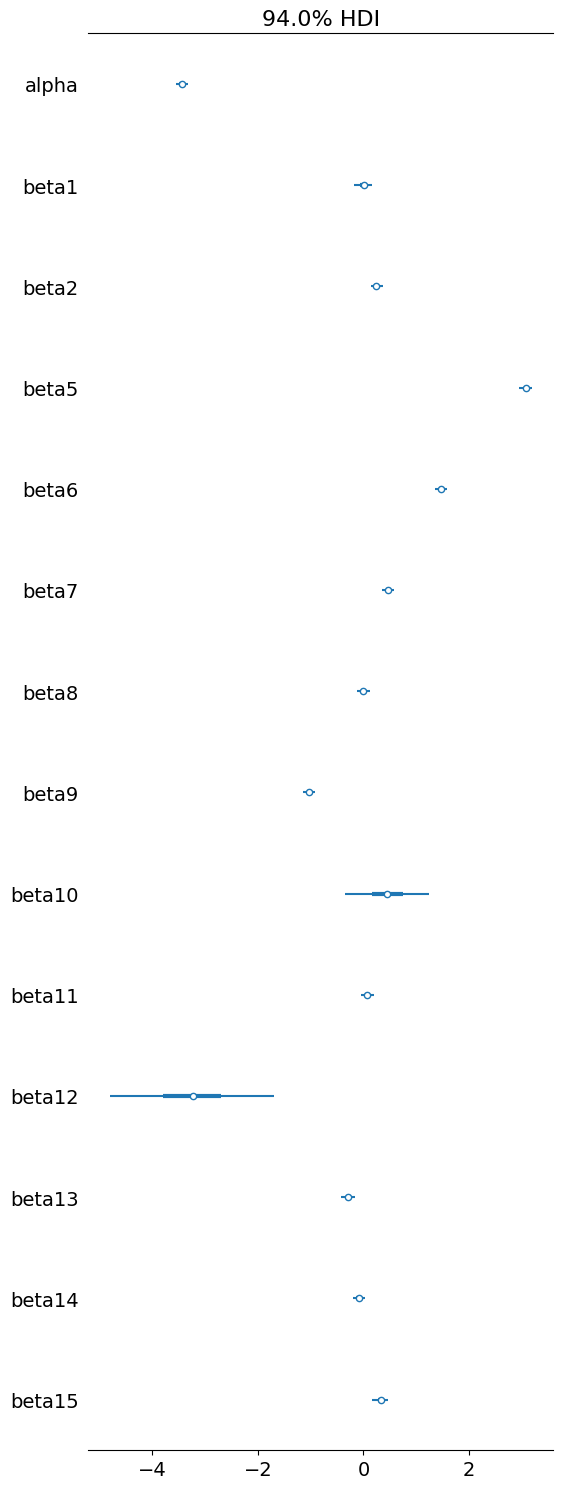

In [ ]:
az.plot_forest(glm_trace_advi2,
               var_names= ['alpha', 'beta1', 'beta2', 'beta5','beta6', 'beta7', 'beta8',
                        'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15'])

# Advi Posterior Predictive 2

In [ ]:
pp_advi2 = pm.sample_posterior_predictive(glm_trace_advi2,
                                         model = glm_model2,
                                         random_seed = random_seed,
                                         var_names= ['alpha', 'beta1', 'beta2', 'beta5',
                                                     'beta6', 'beta7', 'beta8', 'beta9', 'beta10', 'beta11',
                                                     'beta12', 'beta13', 'beta14', 'beta15', 'Yl'],
)
pp_advi12 = pm.sample_posterior_predictive(glm_trace_advi2,
                                         model = glm_model2,
                                         random_seed = random_seed)

<Axes: title={'center': 'Yl / Yl'}>

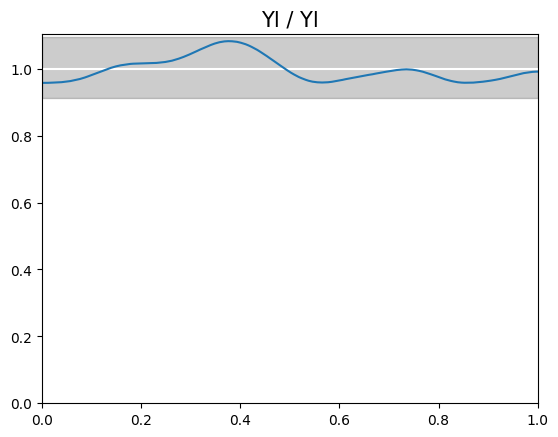

In [ ]:
#az.plot_bpv(pp_advi2)
az.plot_bpv(pp_advi12)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta8'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta10'}>,
        <Axes: title={'center': 'beta11'}>,
        <Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta13'}>],
       [<Axes: title={'center': 'beta14'}>,
        <Axes: title={'center': 'beta15'}>, <Axes: >, <Axes: >]],
      dtype=object)

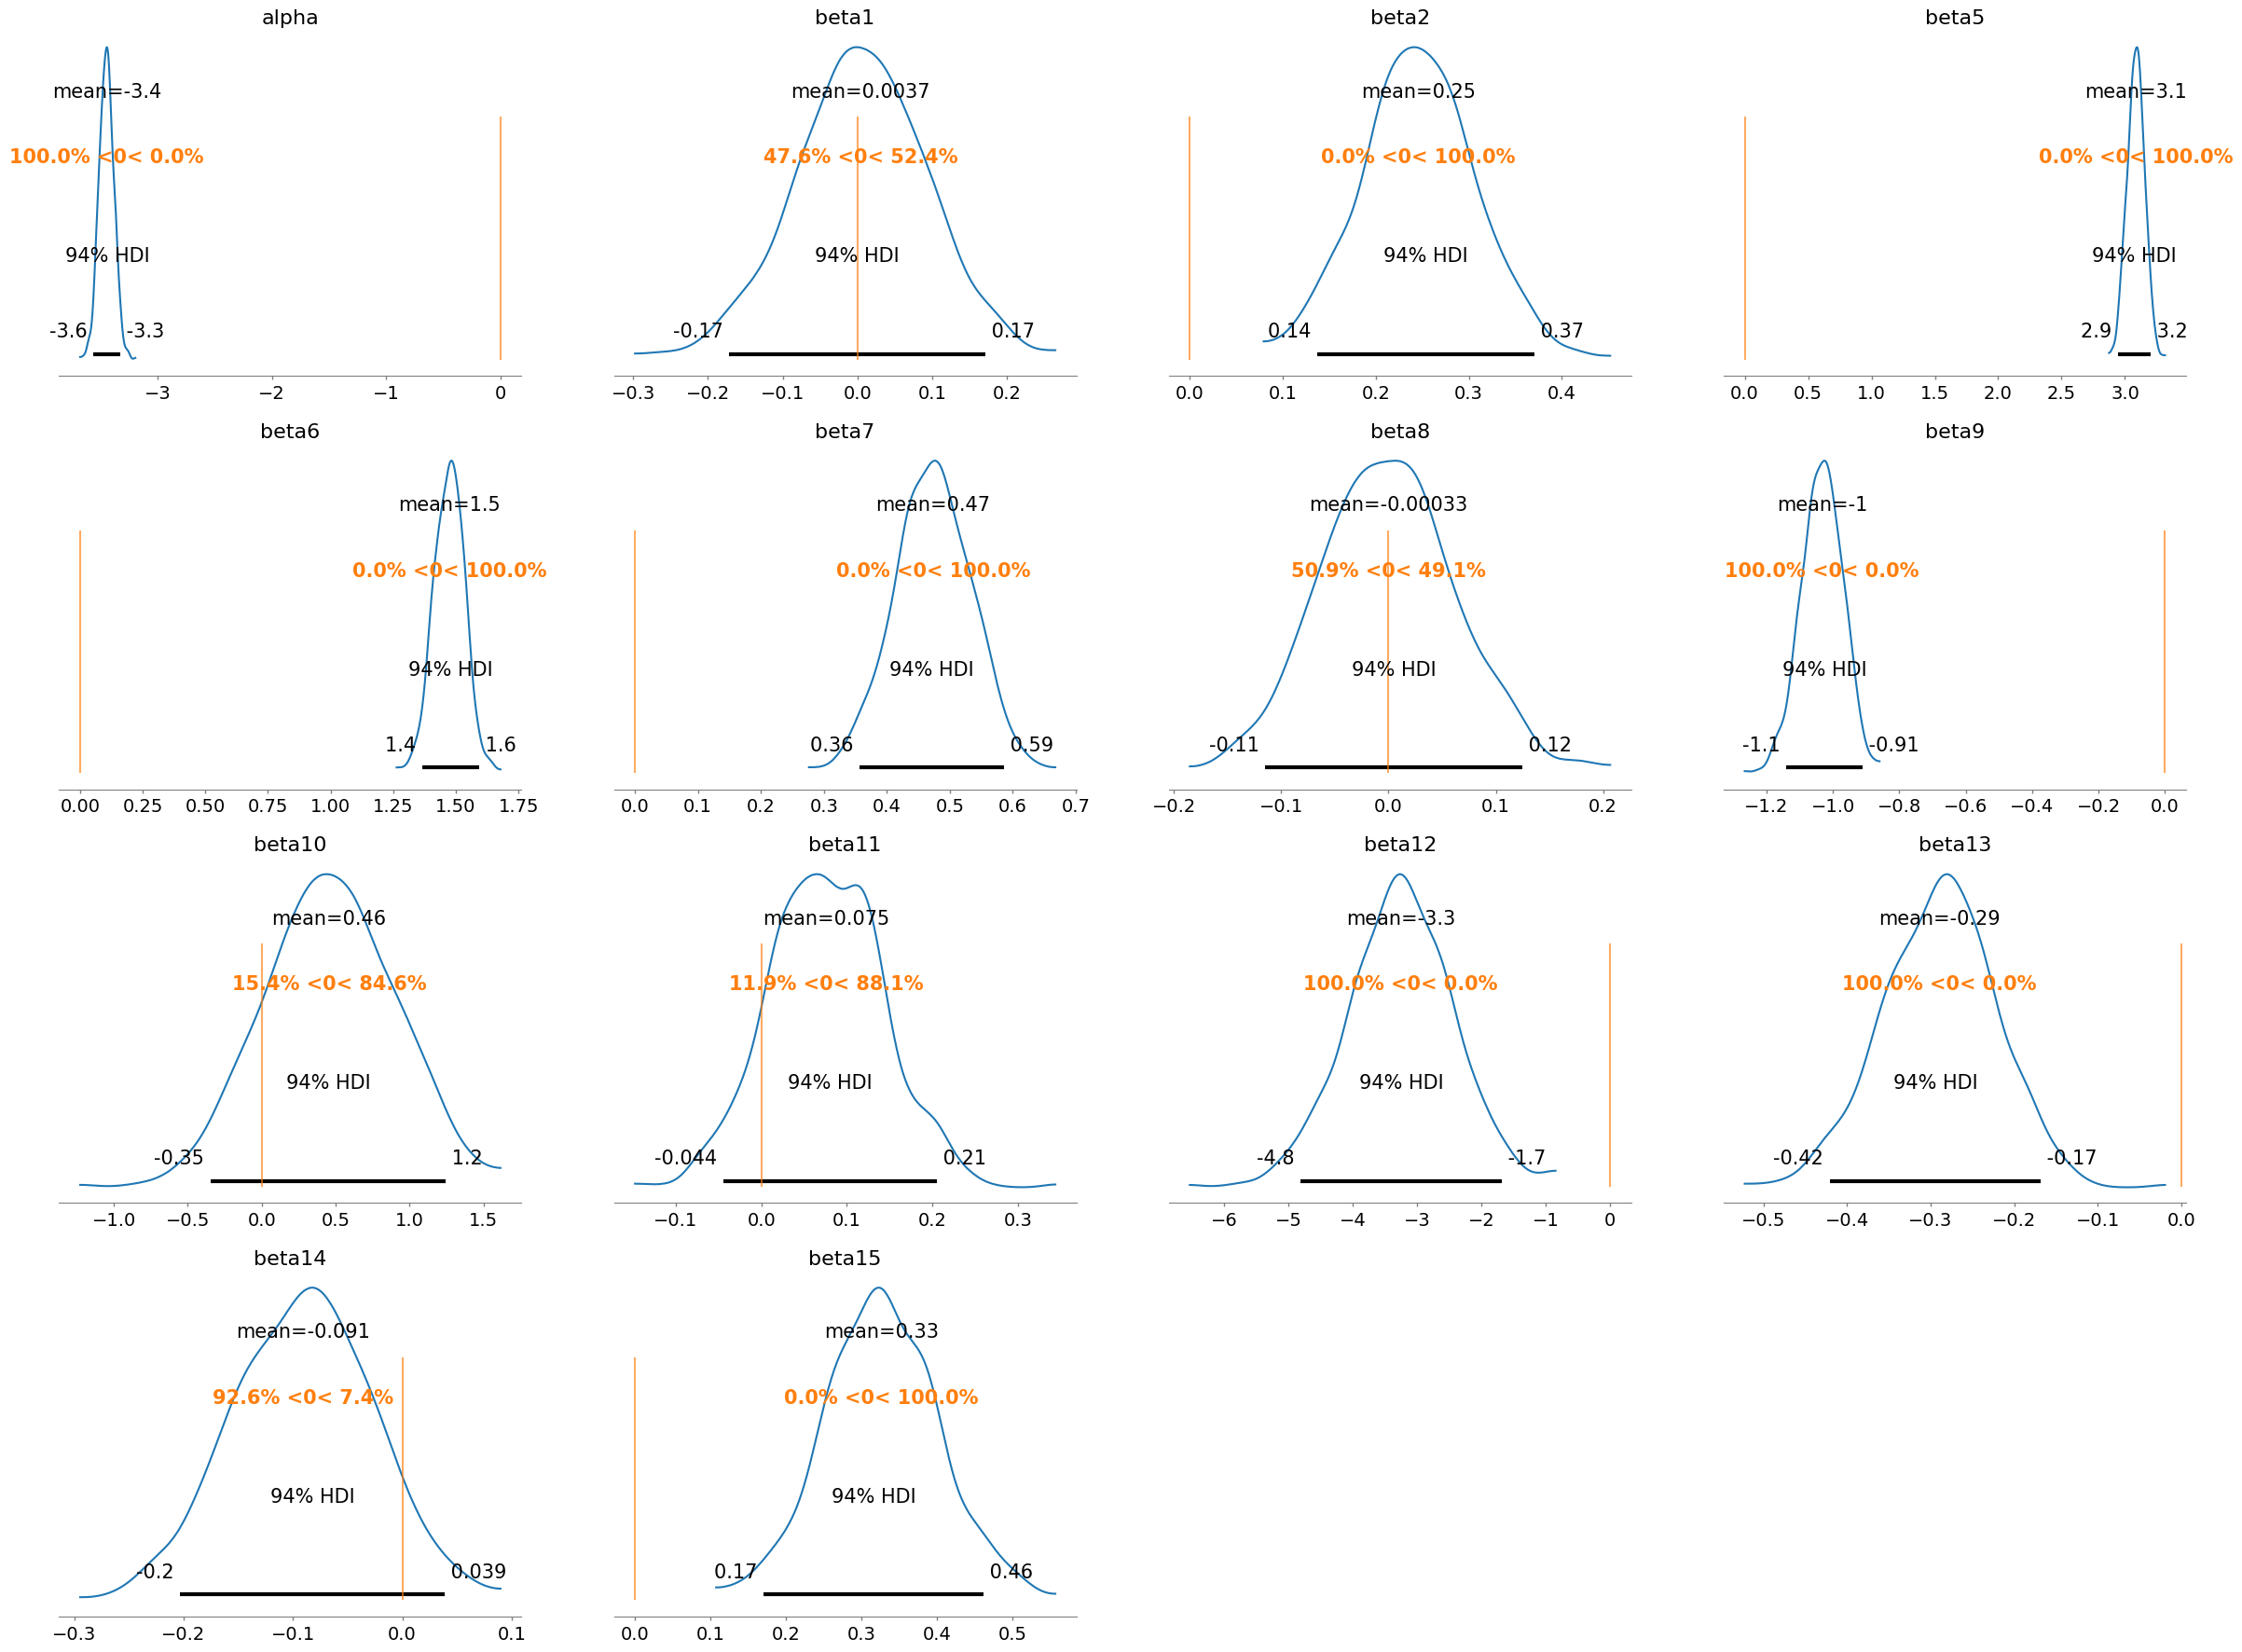

In [ ]:
az.plot_posterior(
    glm_trace_advi2,
    var_names= ['alpha', 'beta1', 'beta2', 'beta5',
                'beta6', 'beta7', 'beta8', 'beta9', 'beta10', 'beta11',
                'beta12', 'beta13', 'beta14', 'beta15'],
ref_val = 0,
)
# alpha, beta2, beta5, beta6, beta7, beta9, beta12, beta13, beta15 are significant
# posterior plots all look good

<Axes: xlabel='Yl / Yl'>

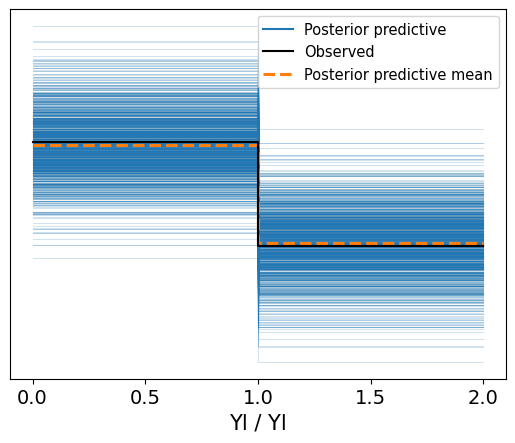

In [ ]:
#az.plot_ppc(pp_advi2)
az.plot_ppc(pp_advi12)

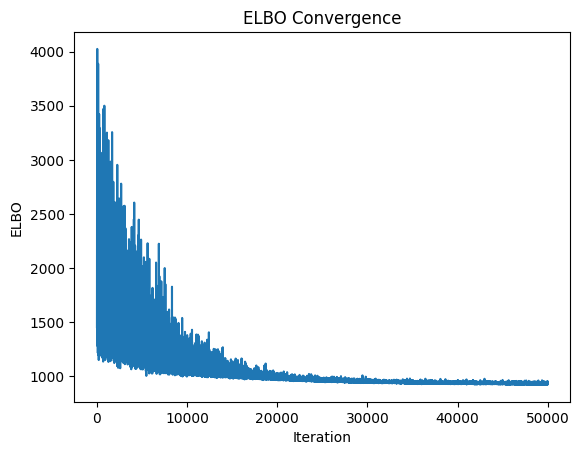

In [ ]:
plt.plot(advi_fit2.hist)
plt.xlabel('Iteration')
plt.ylabel('ELBO')
plt.title('ELBO Convergence')
plt.show()
# Elbo plot looks good and shows clear convergence

# Model 2 - only significant betas

In [ ]:
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=42)

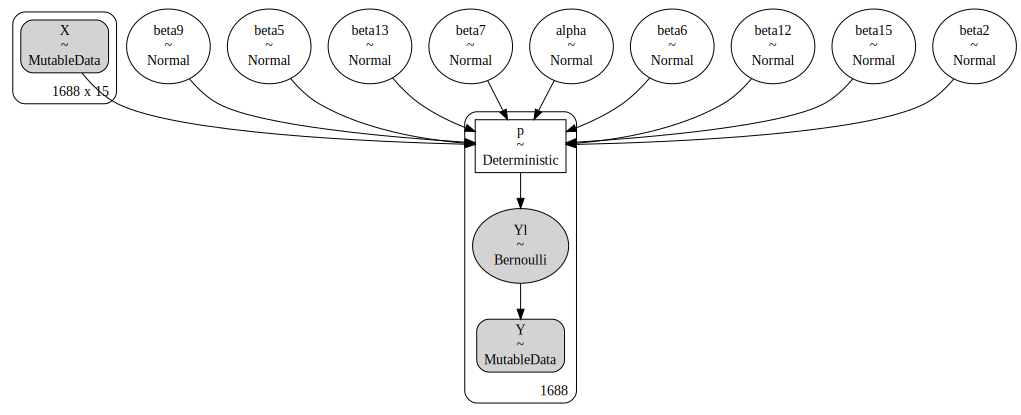

In [ ]:
# Model 2
# alpha, beta2, beta5, beta6, beta7, beta9, beta12, beta13, beta15 are significant

with pm.Model() as glm_model3:

    X = pm.MutableData("X", X)
    Y = pm.MutableData("Y", Y)

    alpha = pm.Normal('alpha', mu=0, sigma=10)
    #beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    #beta3 = pm.Normal('beta3', mu=0, sigma=10)
    #beta4 = pm.Normal('beta4', mu=0, sigma=10)
    beta5 = pm.Normal('beta5', mu=0, sigma=10)
    beta6 = pm.Normal('beta6', mu=0, sigma=10)
    beta7 = pm.Normal('beta7', mu=0, sigma=10)
    #beta8 = pm.Normal('beta8', mu=0, sigma=10)
    beta9 = pm.Normal('beta9', mu=0, sigma=10)
    #beta10 = pm.Normal('beta10', mu=0, sigma=10)
    #beta11 = pm.Normal('beta11', mu=0, sigma=10)
    beta12 = pm.Normal('beta12', mu=0, sigma=10)
    beta13 = pm.Normal('beta13', mu=0, sigma=10)
    #beta14 = pm.Normal('beta14', mu=0, sigma=10)
    beta15 = pm.Normal('beta15', mu=0, sigma=10)

    mu = alpha+beta2*X[:,1]+beta5*X[:,4]+beta6*X[:,5]+beta7*X[:,6]+beta9*X[:,8]+beta12*X[:,11]+beta13*X[:,12]+beta15*X[:,14]
    p = pm.Deterministic('p', pm.invlogit(mu))
    Yl = pm.Bernoulli('Yl', p=p, observed=Y)

pm.model_to_graphviz(glm_model3)

<Axes: >

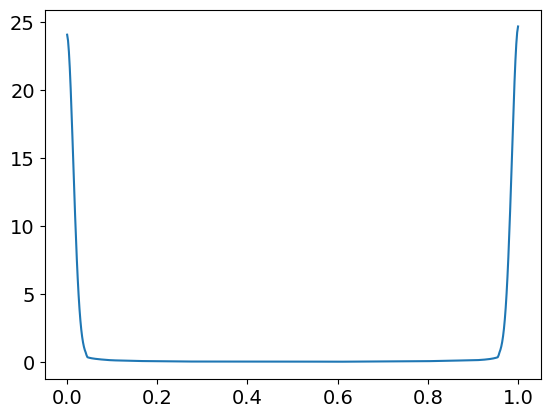

In [ ]:
glm_pp3 = pm.sample_prior_predictive(samples = 500, model=glm_model3, random_seed=random_seed)
az.plot_dist(glm_pp3.prior['p'])
# Distribution looks good below

## Advi sampling 3

In [ ]:
with glm_model3:
    advi_fit3 = pm.fit(method='advi', n=50000, random_seed=random_seed)

advi_trace3 = advi_fit3.sample(1000)
glm_trace_advi3 = pm.to_inference_data(trace=advi_trace3, model=glm_model3, log_likelihood=True)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta5'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta6'}>],
       [<Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta7'}>],
       [<Axes: title={'center': 'beta9'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta12'}>],
       [<Axes: title={'center': 'beta13'}>,
        <Axes: title={'center': 'beta13'}>],
       [<Axes: title={'center': 'beta15'}>,
        <Axes: title={'center': 'beta15'}>]], dtype=object)

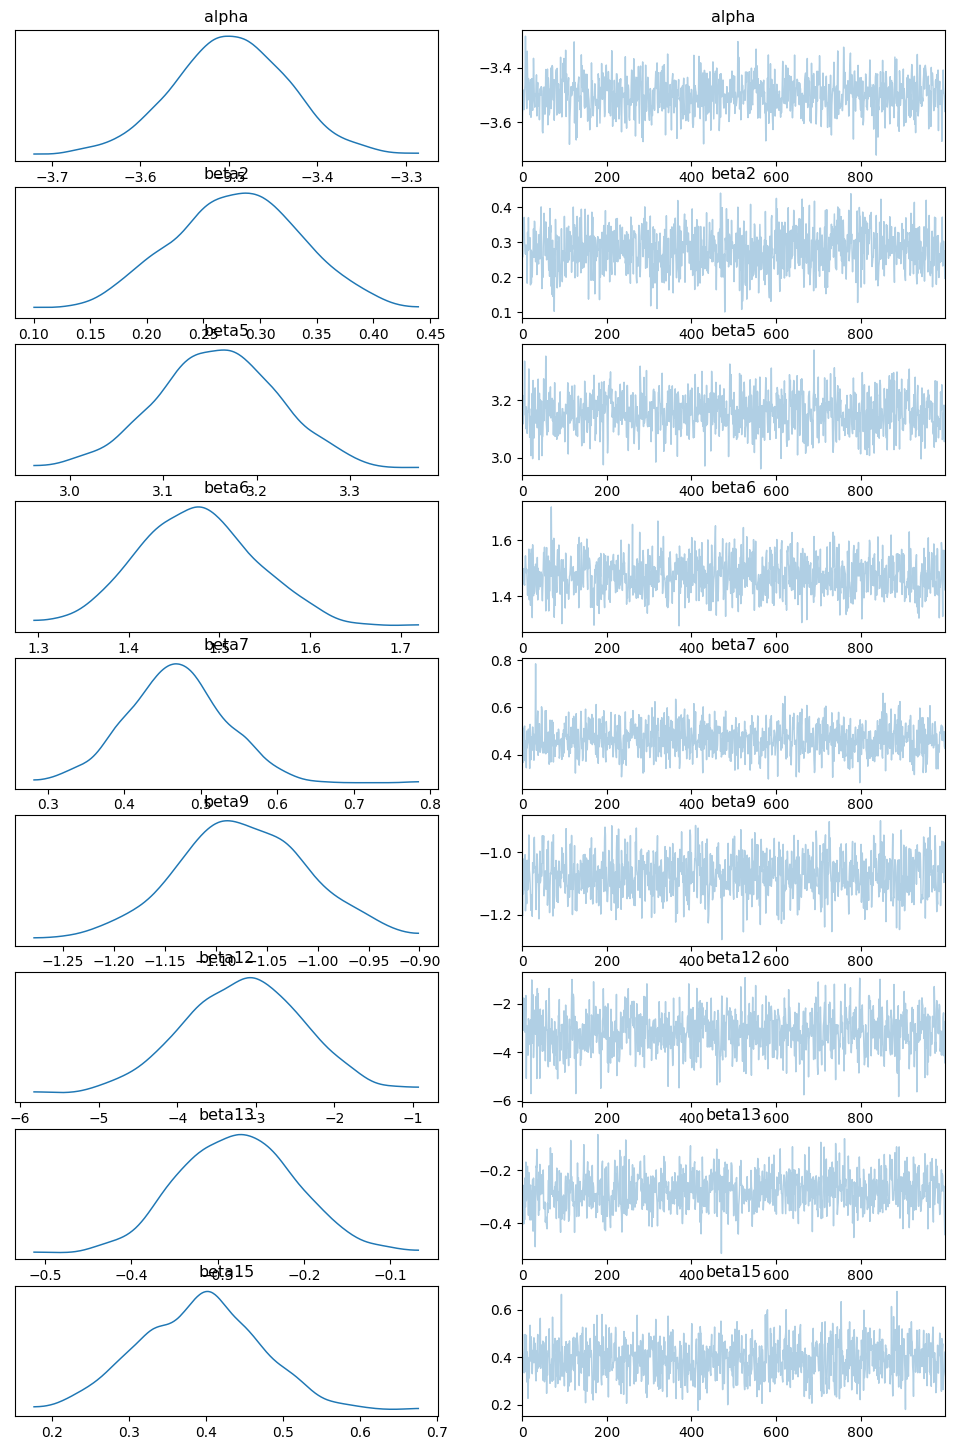

In [ ]:
az.plot_trace(glm_trace_advi3,
              var_names= ['alpha', 'beta2', 'beta5', 'beta6', 'beta7',
                          'beta9', 'beta12', 'beta13', 'beta15'])
# trace plots look good (fuzzy caterpillar distribution)

In [ ]:
az.summary(glm_trace_advi3,
           var_names= ['alpha', 'beta2', 'beta5', 'beta6', 'beta7',
                       'beta9', 'beta12', 'beta13', 'beta15'])
# ESS values greater than 400

Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  -3.498  0.064  -3.627   -3.383      0.002    0.002     899.0     953.0   
beta2   0.279  0.059   0.169    0.389      0.002    0.001     890.0     519.0   
beta5   3.158  0.065   3.046    3.293      0.002    0.002     921.0     979.0   
beta6   1.474  0.064   1.359    1.593      0.002    0.001    1018.0     788.0   
beta7   0.468  0.063   0.357    0.594      0.002    0.001     972.0     809.0   
beta9  -1.074  0.064  -1.186   -0.946      0.002    0.001     938.0     908.0   
beta12 -3.164  0.823  -4.745   -1.664      0.027    0.019     954.0     822.0   
beta13 -0.277  0.067  -0.397   -0.149      0.002    0.002     813.0     716.0   
beta15  0.392  0.078   0.246    0.530      0.002    0.002    1033.0     941.0   

        r_hat  
alpha     NaN  
beta2     NaN  
beta5     NaN  
beta6     NaN  
beta7     NaN  
beta9     NaN  
beta12    NaN  
beta13    NaN  
beta15    NaN

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

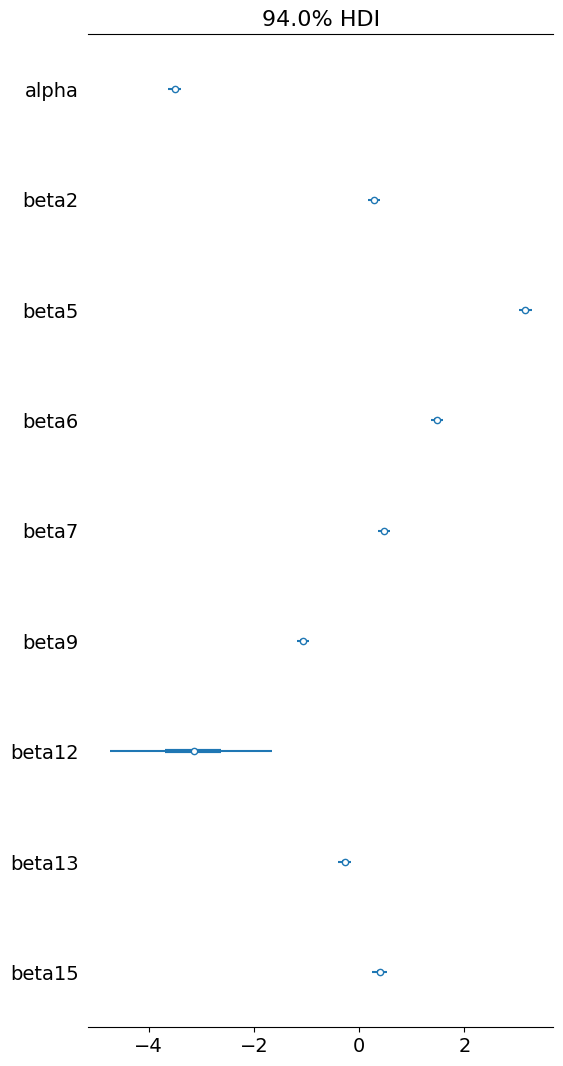

In [ ]:
az.plot_forest(glm_trace_advi3,
               var_names= ['alpha', 'beta2', 'beta5', 'beta6', 'beta7',
                       'beta9', 'beta12', 'beta13', 'beta15'])

In [ ]:
pp_advi3 = pm.sample_posterior_predictive(glm_trace_advi3,
                                          model = glm_model3,
                                          random_seed = random_seed,
                                          var_names= ['alpha', 'beta2', 'beta5', 'beta6', 'beta7',
                                                      'beta9', 'beta12', 'beta13', 'beta15', 'Yl'],
)
pp_advi13 = pm.sample_posterior_predictive(glm_trace_advi3,
                                          model = glm_model3,
                                          random_seed = random_seed)

<Axes: title={'center': 'Yl / Yl'}>

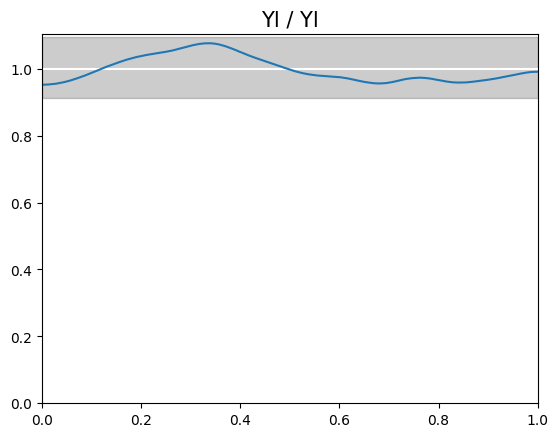

In [ ]:
#az.plot_bpv(pp_advi3)
az.plot_bpv(pp_advi13)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta13'}>,
        <Axes: title={'center': 'beta15'}>]], dtype=object)

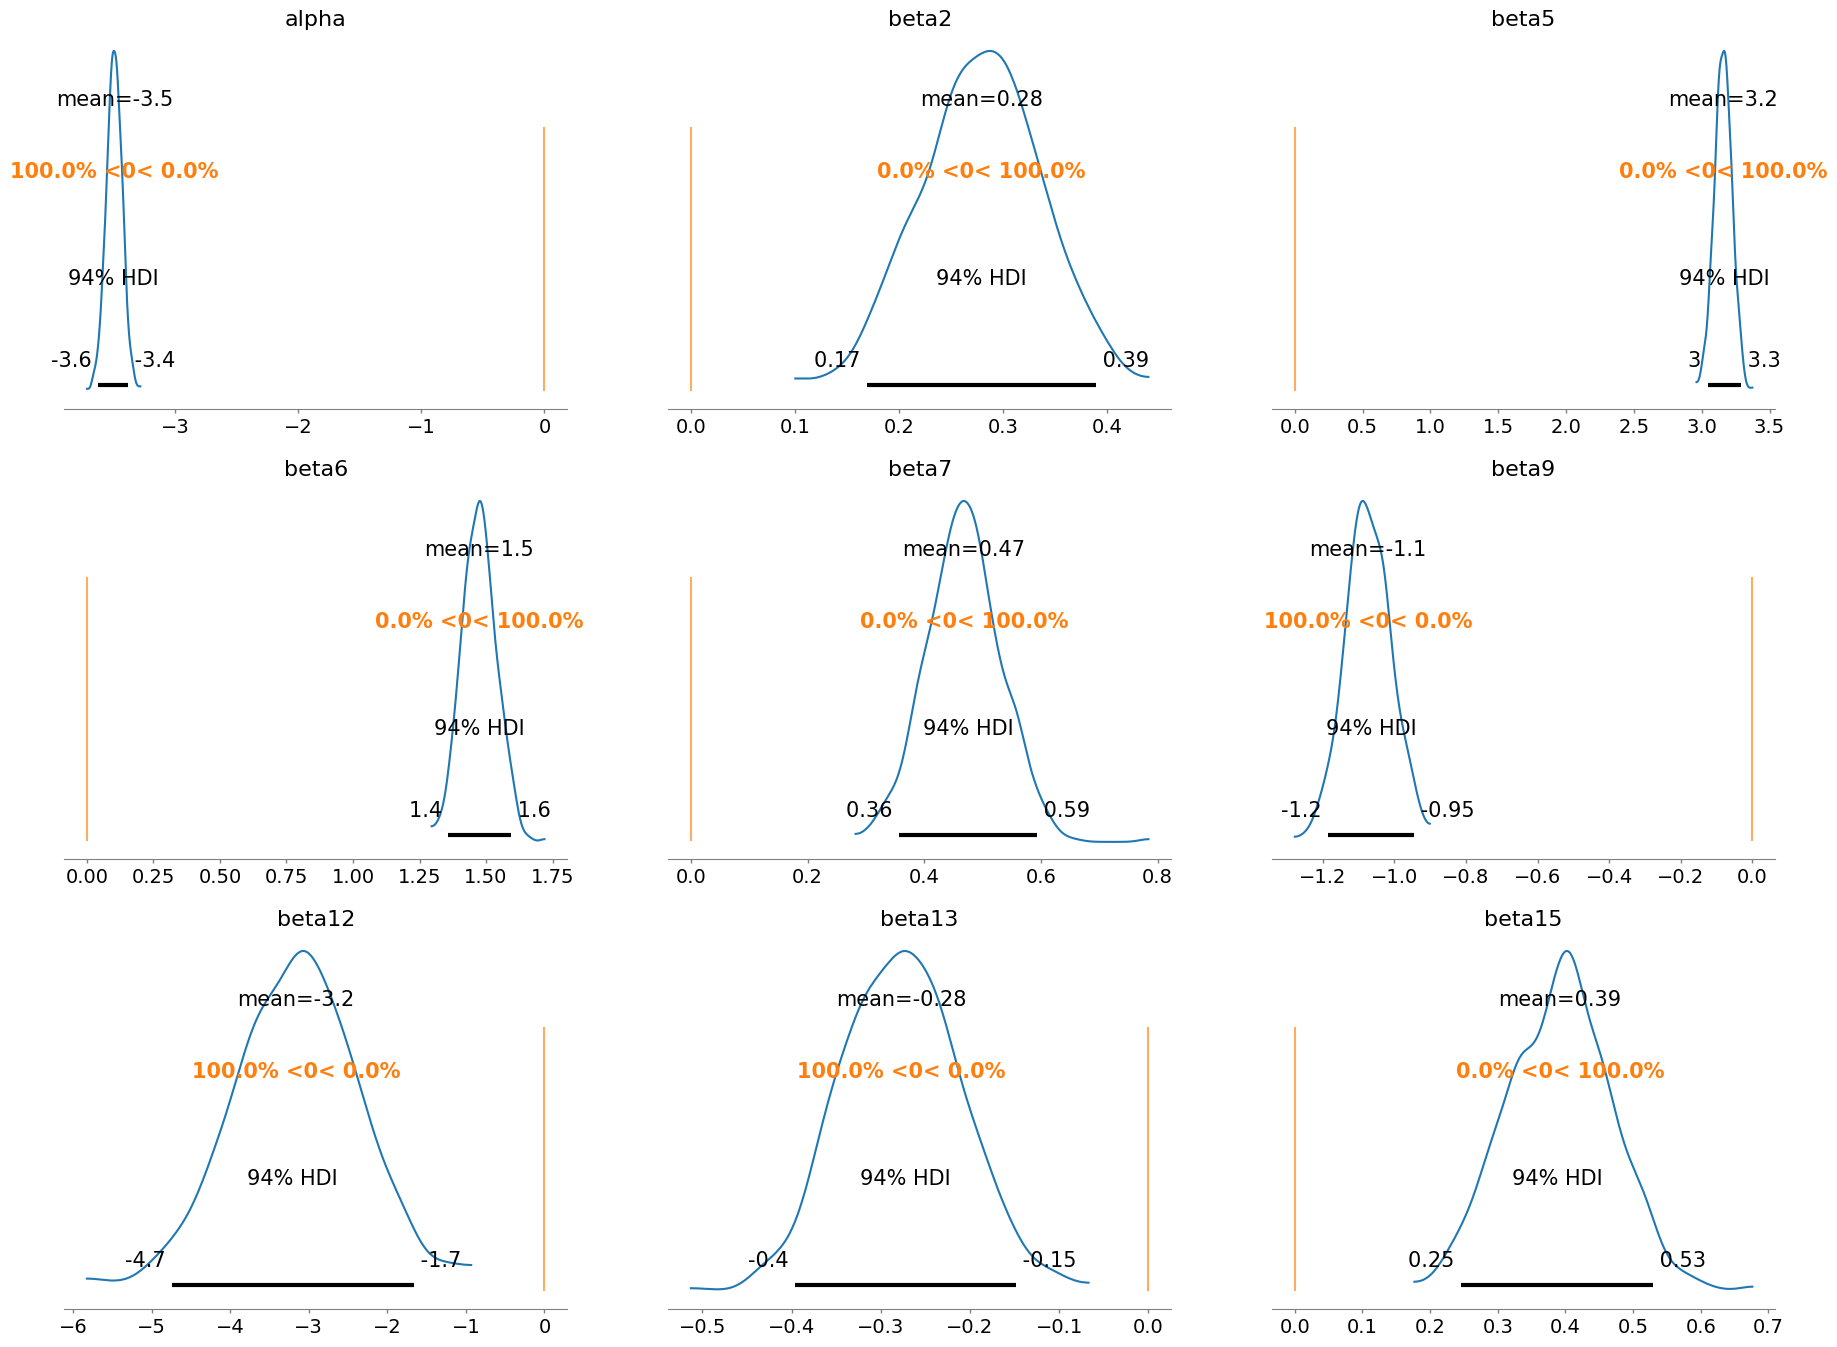

In [ ]:
az.plot_posterior(
    glm_trace_advi3,
    var_names= ['alpha', 'beta2', 'beta5', 'beta6', 'beta7',
                'beta9', 'beta12', 'beta13', 'beta15'],
    ref_val = 0,
)
# All betas in this model are significant
# posterior plots all look good

<Axes: xlabel='Yl / Yl'>

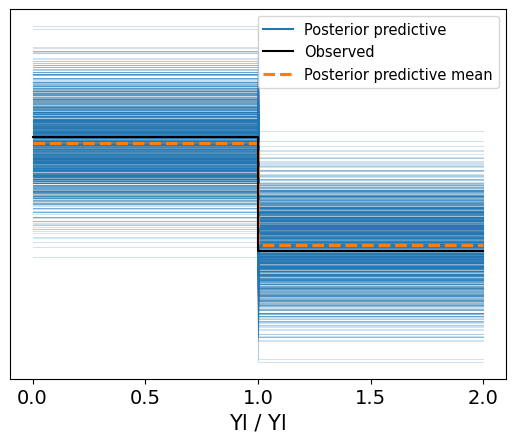

In [ ]:
#az.plot_ppc(pp_advi3)
az.plot_ppc(pp_advi13)

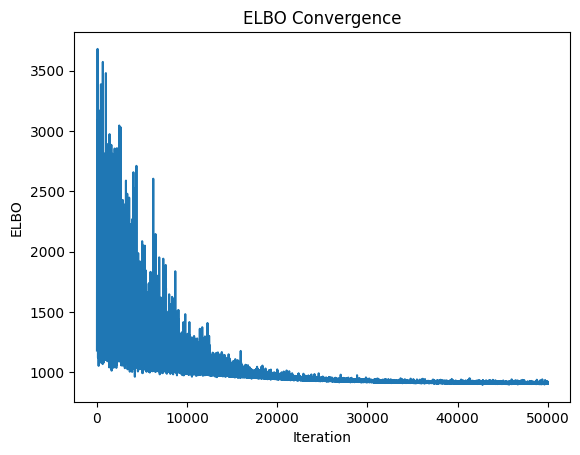

In [ ]:
plt.plot(advi_fit3.hist)
plt.xlabel('Iteration')
plt.ylabel('ELBO')
plt.title('ELBO Convergence')
plt.show()
# Elbo plot looks good and shows clear convergence

# Model 3- all betas plus 5 interactions

In [ ]:
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=42)

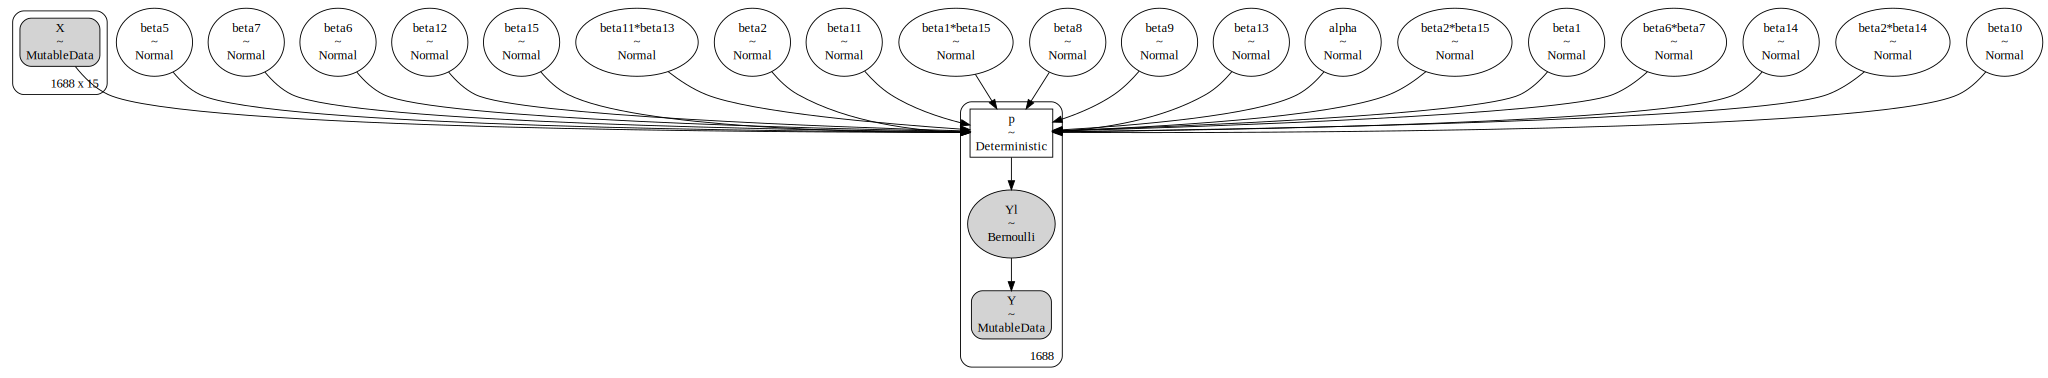

In [ ]:
# Model 3 (interactions)
with pm.Model() as glm_model4:

    X = pm.MutableData("X", X)
    Y = pm.MutableData("Y", Y)

    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10) # age
    #beta3 = pm.Normal('beta3', mu=0, sigma=10) # height
    #beta4 = pm.Normal('beta4', mu=0, sigma=10) # weight
    beta5 = pm.Normal('beta5', mu=0, sigma=10)
    beta6 = pm.Normal('beta6', mu=0, sigma=10)
    beta7 = pm.Normal('beta7', mu=0, sigma=10)
    beta8 = pm.Normal('beta8', mu=0, sigma=10)
    beta9 = pm.Normal('beta9', mu=0, sigma=10)
    beta10 = pm.Normal('beta10', mu=0, sigma=10)
    beta11 = pm.Normal('beta11', mu=0, sigma=10) # Ch2o
    beta12 = pm.Normal('beta12', mu=0, sigma=10)
    beta13 = pm.Normal('beta13', mu=0, sigma=10) # faf
    beta14 = pm.Normal('beta14', mu=0, sigma=10) # tue
    beta15 = pm.Normal('beta15', mu=0, sigma=10)

    # interactions
    interaction1 = X[:,1] * X[:,13]
    interaction2 = X[:,10] * X[:,12]
    interaction3 = X[:,0] * X[:,14]
    interaction4 = X[:,1] * X[:,14]
    interaction5 = X[:,5] * X[:,6]

    beta_interaction1 = pm.Normal('beta2*beta14', mu=0, sigma=10)
    beta_interaction2 = pm.Normal('beta11*beta13', mu=0, sigma=10)
    beta_interaction3 = pm.Normal('beta1*beta15', mu=0, sigma=10)
    beta_interaction4 = pm.Normal('beta2*beta15', mu=0, sigma=10)
    beta_interaction5 = pm.Normal('beta6*beta7', mu=0, sigma=10)

    mu = alpha+beta1*X[:,0]+beta2*X[:,1]+beta5*X[:,4]+beta6*X[:,5]+beta7*X[:,6]+beta8*X[:,7]+beta9*X[:,8]+beta10*X[:,9]+beta11*X[:,10]+beta12*X[:,11]+beta13*X[:,12]+beta14*X[:,13]+beta15*X[:,14] +interaction3*beta_interaction3 + interaction1*beta_interaction1 + interaction2*beta_interaction2 + interaction4*beta_interaction4 + interaction5*beta_interaction5
    p = pm.Deterministic('p', pm.invlogit(mu))
    Yl = pm.Bernoulli('Yl', p=p, observed=Y)

pm.model_to_graphviz(glm_model4)

<Axes: >

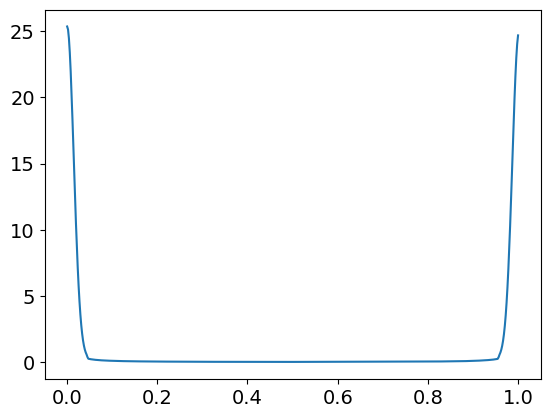

In [ ]:
glm_pp4 = pm.sample_prior_predictive(samples = 500, model=glm_model4, random_seed=random_seed)
az.plot_dist(glm_pp4.prior['p'])
# Distribution looks good below

# ADVI Sampling 4 (w interactions)

In [ ]:
with glm_model4:
    advi_fit4 = pm.fit(method='advi', n=50000, random_seed=random_seed)

advi_trace4 = advi_fit4.sample(1000)
glm_trace_advi4 = pm.to_inference_data(trace=advi_trace4, model=glm_model4, log_likelihood=True)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta5'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta6'}>],
       [<Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta7'}>],
       [<Axes: title={'center': 'beta8'}>,
        <Axes: title={'center': 'beta8'}>],
       [<Axes: title={'center': 'beta9'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta10'}>,
        <Axes: title={'center': 'beta10'}>],
       [<Axes: title={'center': 'beta11'}>,
        <Axes: title={'center': 'beta11'}>],
       [<Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta12'}>],
       [<Axes: title={'center': 'beta

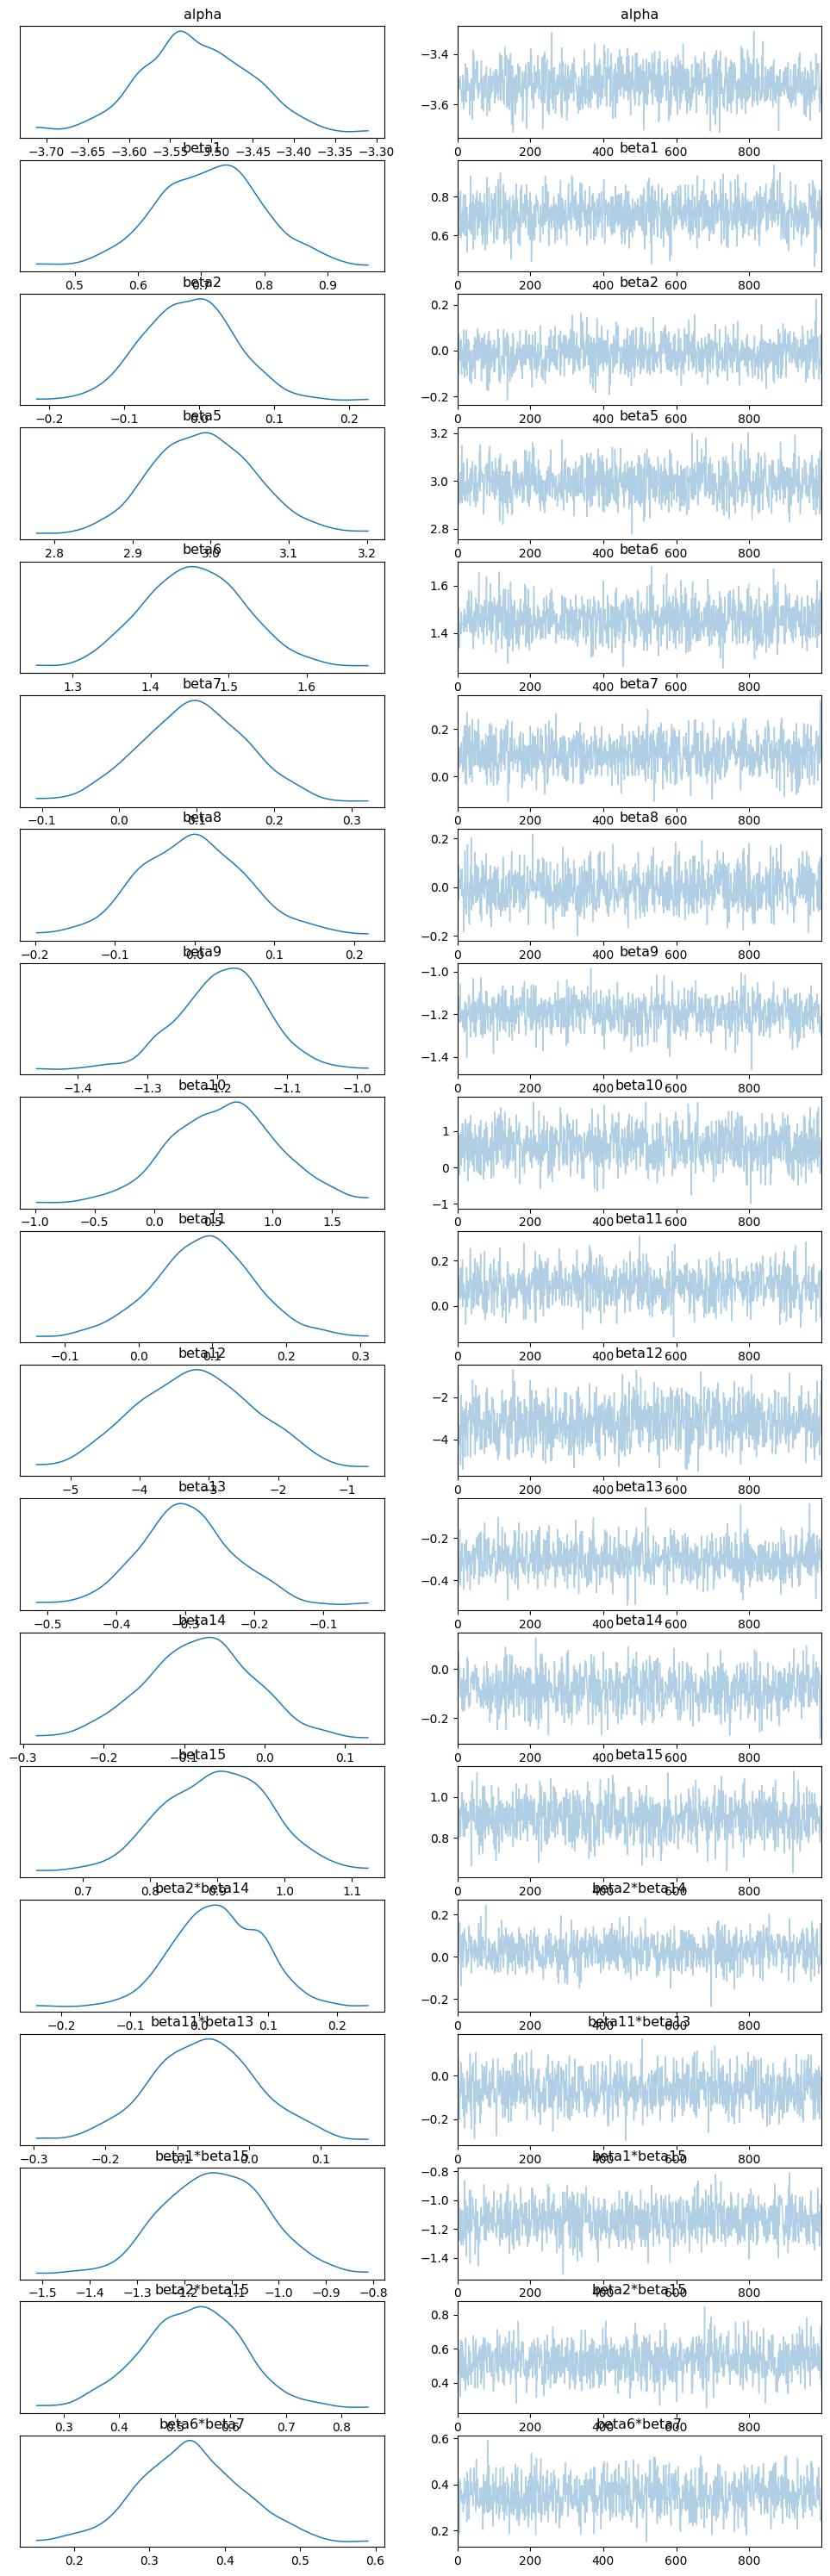

In [ ]:
az.plot_trace(glm_trace_advi4,
              var_names= ['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                           'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15','beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7'])

# trace plots look good (fuzzy caterpillar distribution)

In [ ]:
az.summary(glm_trace_advi4,
           var_names=['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                           'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15','beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7'])
# ESS values greater than 400

Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha         -3.520  0.064  -3.635   -3.397      0.002    0.001     968.0   
beta1          0.714  0.082   0.556    0.868      0.003    0.002     869.0   
beta2         -0.014  0.060  -0.123    0.096      0.002    0.001     916.0   
beta5          2.991  0.065   2.861    3.102      0.002    0.001    1075.0   
beta6          1.457  0.066   1.326    1.571      0.002    0.001    1132.0   
beta7          0.096  0.067  -0.034    0.215      0.002    0.002     968.0   
beta8         -0.002  0.067  -0.121    0.134      0.002    0.002    1041.0   
beta9         -1.192  0.064  -1.305   -1.071      0.002    0.002     867.0   
beta10         0.591  0.446  -0.162    1.517      0.015    0.011     879.0   
beta11         0.089  0.067  -0.041    0.214      0.002    0.002    1010.0   
beta12        -3.183  0.872  -4.809   -1.642      0.029    0.021     892.0   
beta13        -0.298  0.069  -0.419   -0.163      0.002    0.001    1082.0   
beta14        -0.081  0.067  -0.213    0.034      0.002    0.002     885.0   
beta15         0.898  0.080   0.762    1.056      0.003    0.002     978.0   
beta2*beta14   0.028  0.063  -0.086    0.139      0.002    0.001     979.0   
beta11*beta13 -0.062  0.072  -0.196    0.079      0.002    0.002     951.0   
beta1*beta15  -1.135  0.106  -1.316   -0.930      0.003    0.002    1007.0   
beta2*beta15   0.531  0.089   0.356    0.685      0.003    0.002     952.0   
beta6*beta7    0.355  0.067   0.233    0.486      0.002    0.002     882.0   

               ess_tail  r_hat  
alpha             868.0    NaN  
beta1             939.0    NaN  
beta2            1000.0    NaN  
beta5             927.0    NaN  
beta6             951.0    NaN  
beta7             842.0    NaN  
beta8             944.0    NaN  
beta9             944.0    NaN  
beta10            983.0    NaN  
beta11            942.0    NaN  
beta12            946.0    NaN  
beta13            981.0    NaN  
beta14            990.0    NaN  
beta15            873.0    NaN  
beta2*beta14      867.0    NaN  
beta11*beta13    1023.0    NaN  
beta1*beta15      946.0    NaN  
beta2*beta15      872.0    NaN  
beta6*beta7       983.0    NaN

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

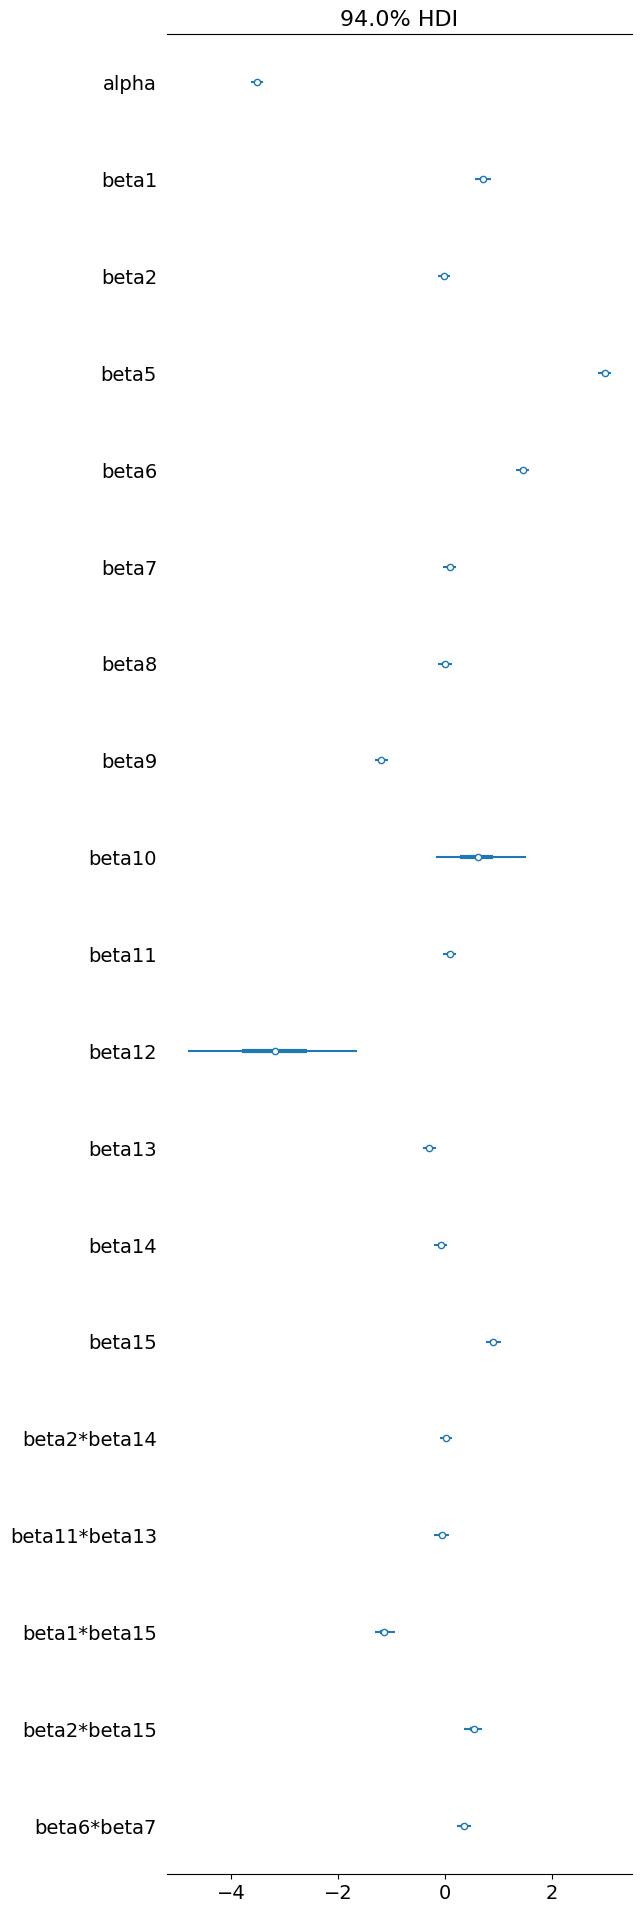

In [ ]:
az.plot_forest(glm_trace_advi4,
                var_names= ['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                           'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15','beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7'])

In [ ]:
pp_advi4 = pm.sample_posterior_predictive(glm_trace_advi4,
                                          model = glm_model4,
                                          random_seed = random_seed,
                                          var_names= ['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                           'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15','beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7'],
)
pp_advi14 = pm.sample_posterior_predictive(glm_trace_advi4,
                                          model = glm_model4,
                                          random_seed = random_seed)

<Axes: title={'center': 'Yl / Yl'}>

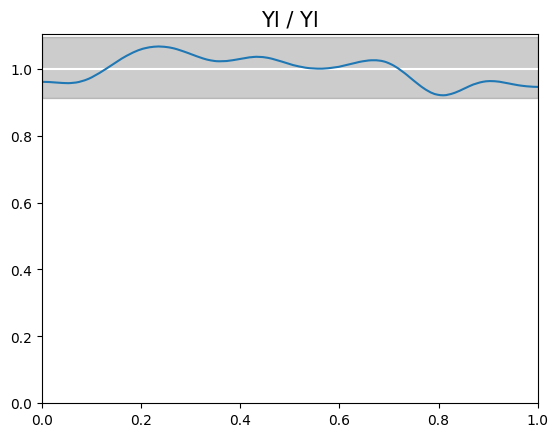

In [ ]:
#az.plot_bpv(pp_advi4)
az.plot_bpv(pp_advi14)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta8'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta10'}>,
        <Axes: title={'center': 'beta11'}>,
        <Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta13'}>],
       [<Axes: title={'center': 'beta14'}>,
        <Axes: title={'center': 'beta15'}>,
        <Axes: title={'center': 'beta2*beta14'}>,
        <Axes: title={'center': 'beta11*beta13'}>],
       [<Axes: title={'center': 'beta1*beta15'}>,
        <Axes: title={'center': 'beta2*beta15'}>,
        <Axes: title={'center': 'beta6*beta7'}>, <Axes: >]], dtype=object)

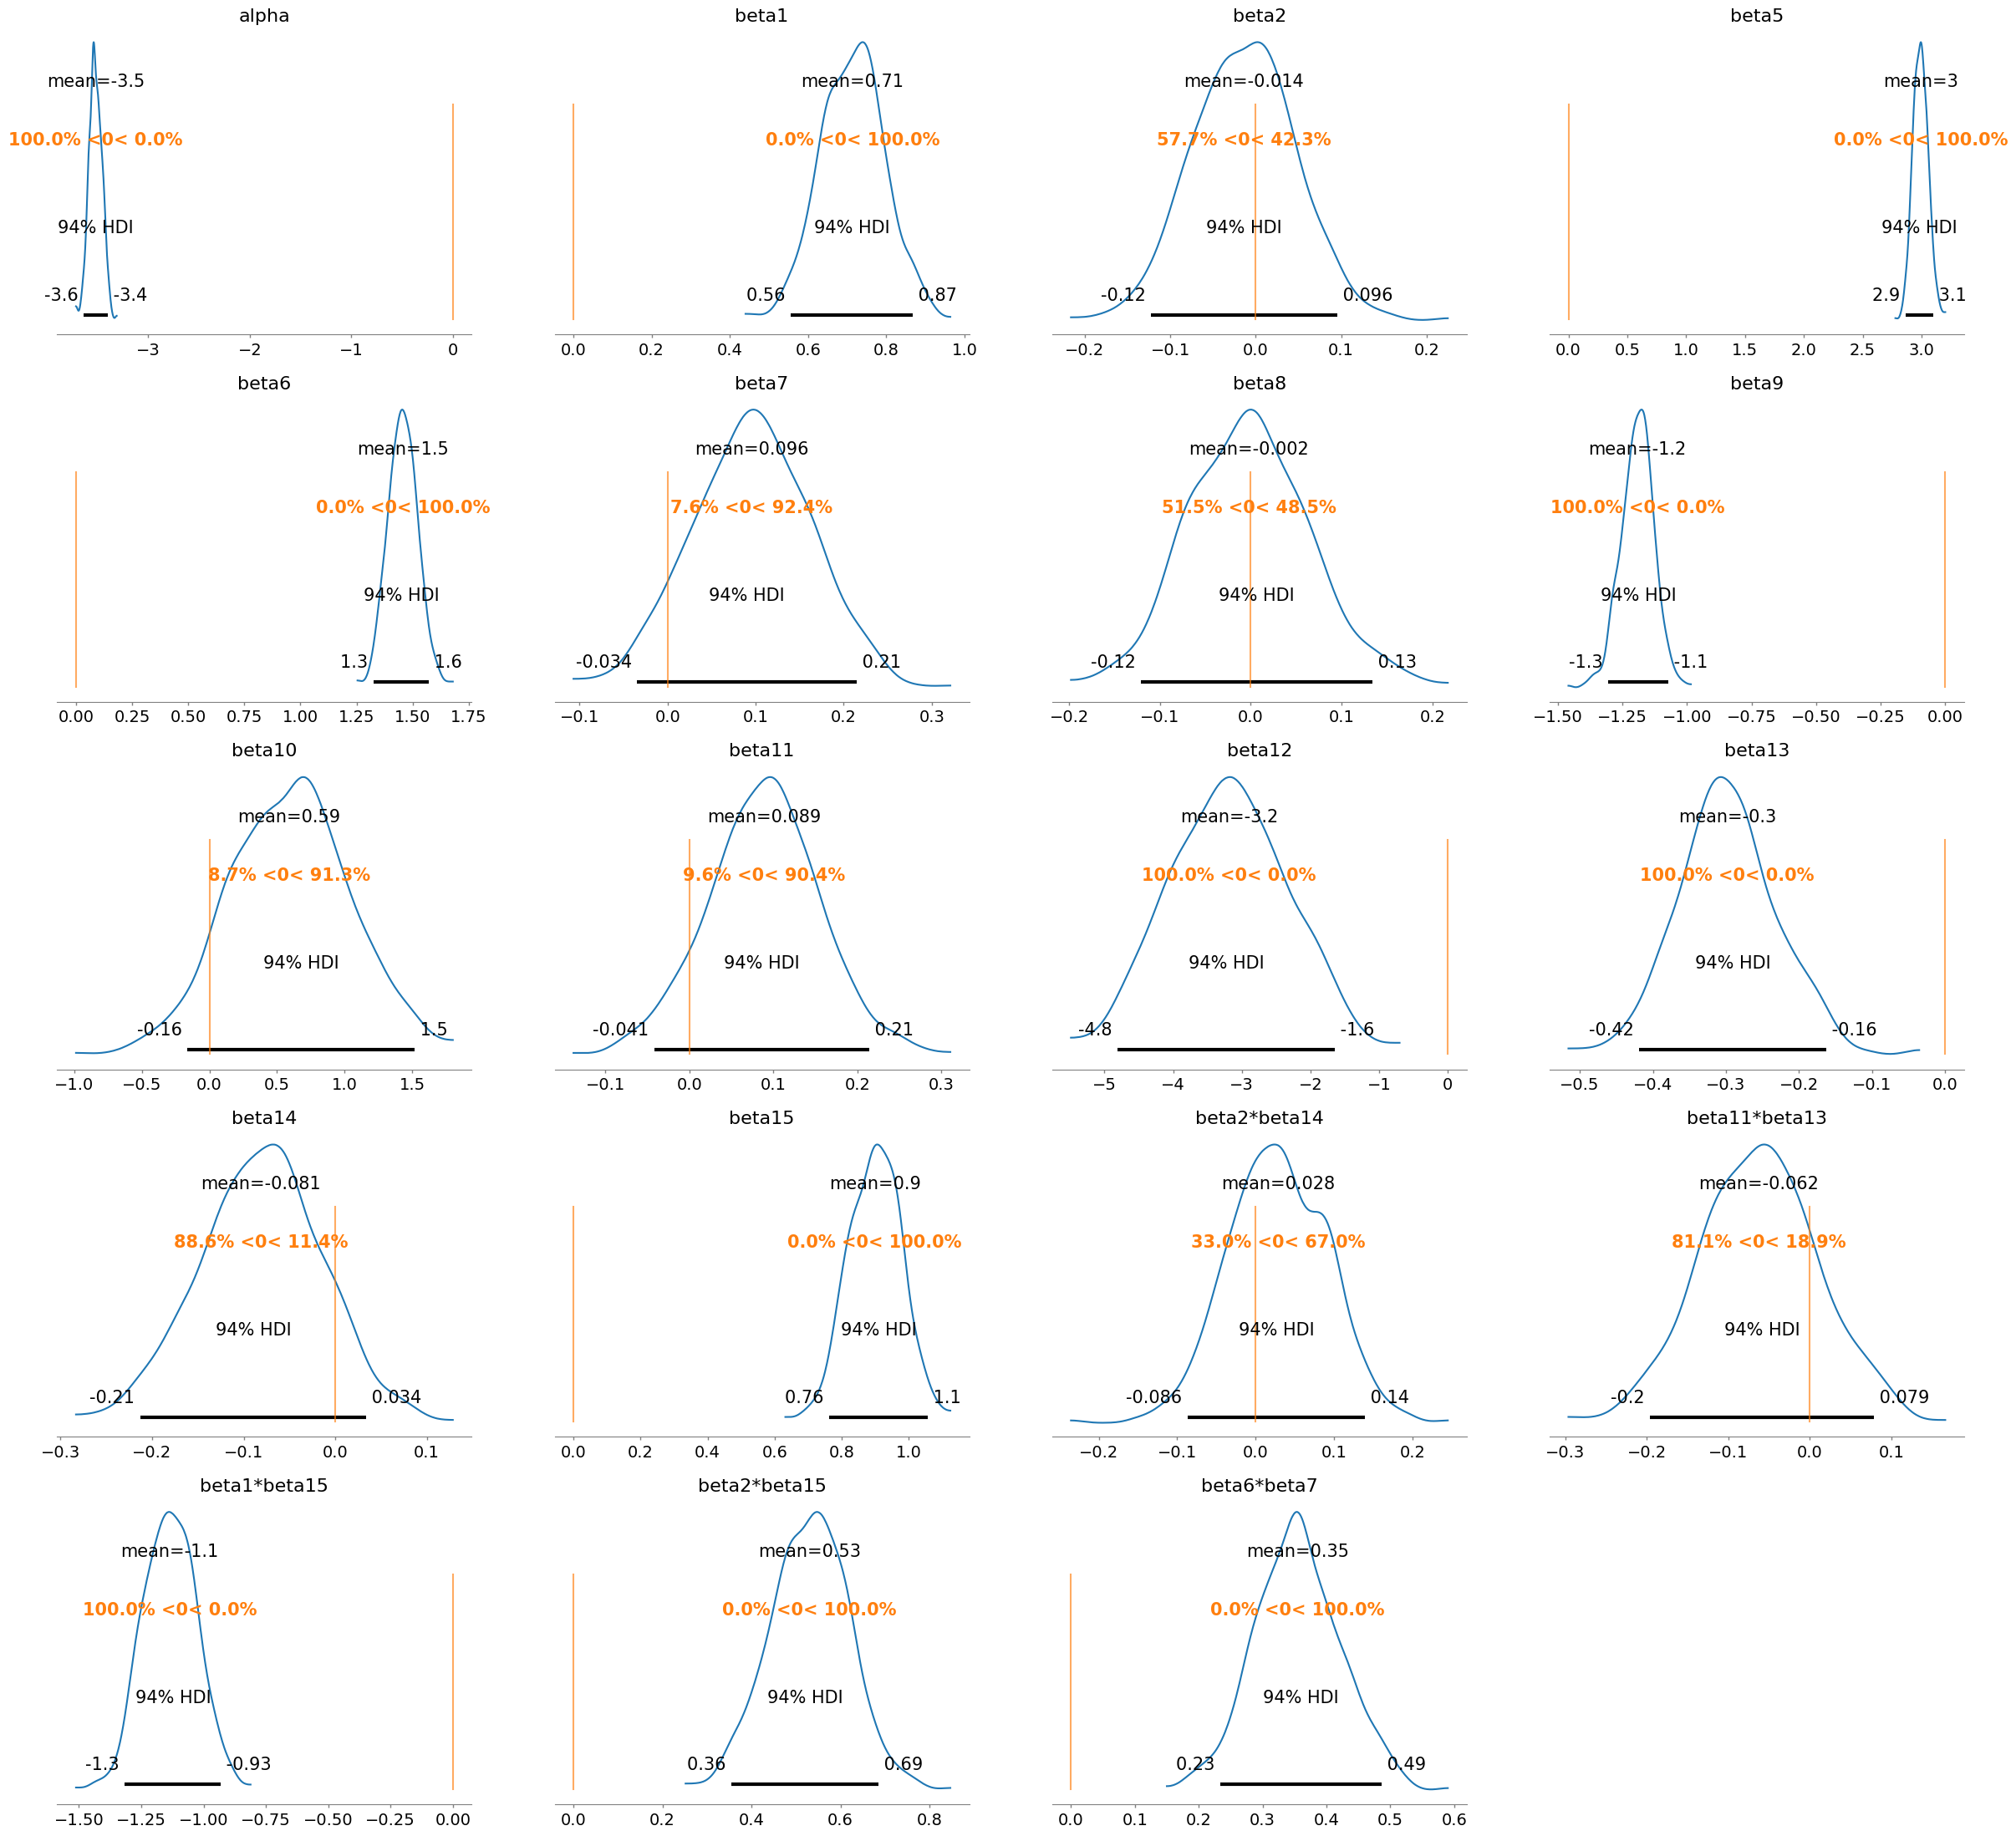

In [ ]:
az.plot_posterior(
    glm_trace_advi4,
    var_names= ['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                           'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15','beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7'],
    ref_val = 0,
)
# posterior plots all look good
# beta1, beta5, beta6, beta9, beta12, beta13, beta15, beta2*beta15*, beta6*beta7

<Axes: xlabel='Yl / Yl'>

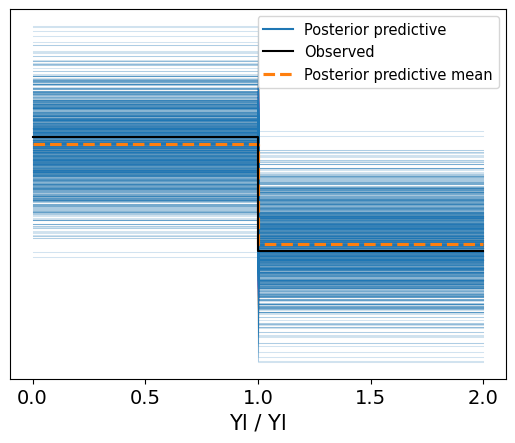

In [ ]:
#az.plot_ppc(pp_advi4)
az.plot_ppc(pp_advi14)

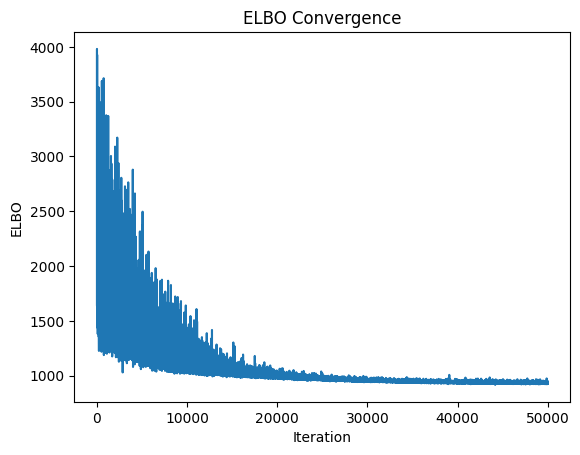

In [ ]:
plt.plot(advi_fit4.hist)
plt.xlabel('Iteration')
plt.ylabel('ELBO')
plt.title('ELBO Convergence')
plt.show()
# Elbo plot looks good and shows clear convergence

# Model 4 - only significant betas and significant interactions

In [ ]:
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=42)

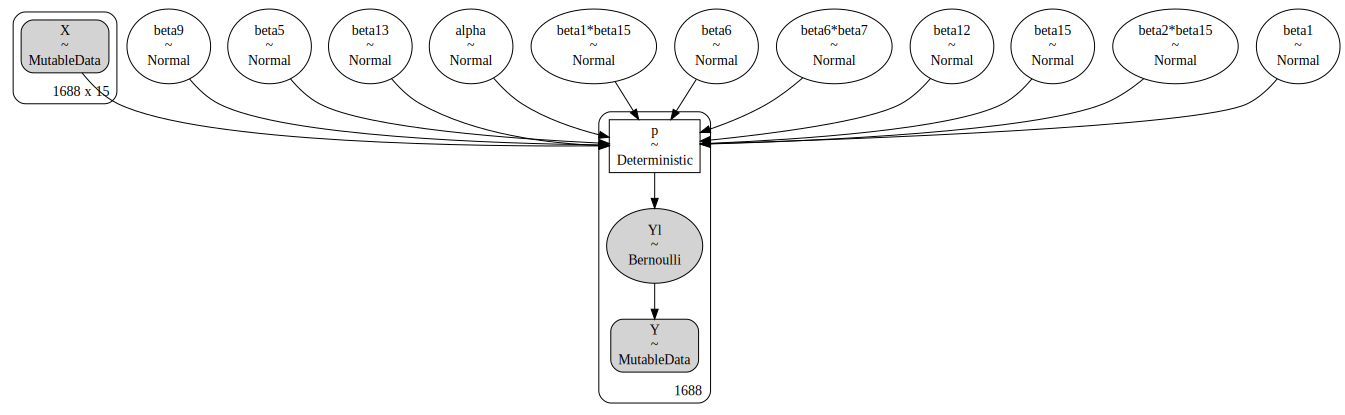

In [ ]:
# Model 4 (interactions)
# beta1, beta5, beta6, beta7, beta9, beta12, beta13, beta15, beta2*beta15*, beta6*beta7, beta1*beta15
with pm.Model() as glm_model5:

    X = pm.MutableData("X", X)
    Y = pm.MutableData("Y", Y)

    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    #beta2 = pm.Normal('beta2', mu=0, sigma=10) # age
    #beta3 = pm.Normal('beta3', mu=0, sigma=10) # height
    #beta4 = pm.Normal('beta4', mu=0, sigma=10) # weight
    beta5 = pm.Normal('beta5', mu=0, sigma=10)
    beta6 = pm.Normal('beta6', mu=0, sigma=10)
    #beta7 = pm.Normal('beta7', mu=0, sigma=10)
    #beta8 = pm.Normal('beta8', mu=0, sigma=10)
    beta9 = pm.Normal('beta9', mu=0, sigma=10)
    #beta10 = pm.Normal('beta10', mu=0, sigma=10)
    #beta11 = pm.Normal('beta11', mu=0, sigma=10) # Ch2o
    beta12 = pm.Normal('beta12', mu=0, sigma=10)
    beta13 = pm.Normal('beta13', mu=0, sigma=10) # faf
    #beta14 = pm.Normal('beta14', mu=0, sigma=10) # tue
    beta15 = pm.Normal('beta15', mu=0, sigma=10)

    # interactions
    #interaction1 = X[:,1] * X[:,13]
    #interaction2 = X[:,10] * X[:,12]
    interaction3 = X[:,0] * X[:,14]
    interaction4 = X[:,1] * X[:,14]
    interaction5 = X[:,5] * X[:,6]

    #beta_interaction1 = pm.Normal('beta2*beta14', mu=0, sigma=10)
    #beta_interaction2 = pm.Normal('beta11*beta13', mu=0, sigma=10)
    beta_interaction3 = pm.Normal('beta1*beta15', mu=0, sigma=10)
    beta_interaction4 = pm.Normal('beta2*beta15', mu=0, sigma=10)
    beta_interaction5 = pm.Normal('beta6*beta7', mu=0, sigma=10)

    mu = alpha+beta1*X[:,0]+beta5*X[:,4]+beta6*X[:,5]+beta9*X[:,8]+beta12*X[:,11]+beta13*X[:,12]+beta15*X[:,14]+ interaction3*beta_interaction3 +interaction4*beta_interaction4 + interaction5*beta_interaction5
    p = pm.Deterministic('p', pm.invlogit(mu))
    Yl = pm.Bernoulli('Yl', p=p, observed=Y)

pm.model_to_graphviz(glm_model5)

<Axes: >

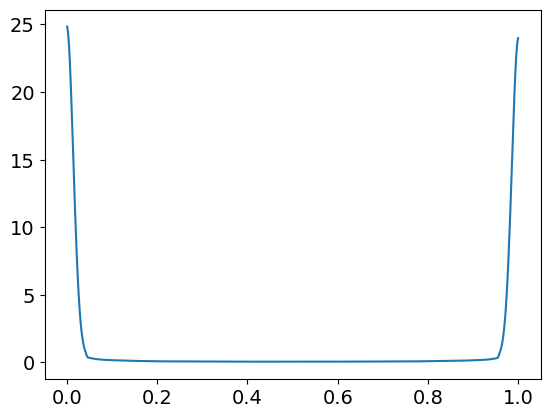

In [ ]:
glm_pp5 = pm.sample_prior_predictive(samples = 500, model=glm_model5, random_seed=random_seed)
az.plot_dist(glm_pp5.prior['p'])
# Distribution looks good below

In [ ]:
with glm_model5:
    advi_fit5 = pm.fit(method='advi', n=50000, random_seed=random_seed)

advi_trace5 = advi_fit5.sample(1000)
glm_trace_advi5 = pm.to_inference_data(trace=advi_trace5, model=glm_model5, log_likelihood=True)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta5'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta6'}>],
       [<Axes: title={'center': 'beta9'}>,
        <Axes: title={'center': 'beta9'}>],
       [<Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta12'}>],
       [<Axes: title={'center': 'beta13'}>,
        <Axes: title={'center': 'beta13'}>],
       [<Axes: title={'center': 'beta15'}>,
        <Axes: title={'center': 'beta15'}>],
       [<Axes: title={'center': 'beta2*beta15'}>,
        <Axes: title={'center': 'beta2*beta15'}>],
       [<Axes: title={'center': 'beta6*beta7'}>,
        <Axes: title={'center': 'beta6*beta7'}>],
       [<Axes: title={'center': 'beta1*beta15'}>,
        <Axes: title={'center': 'beta1*beta15'}>

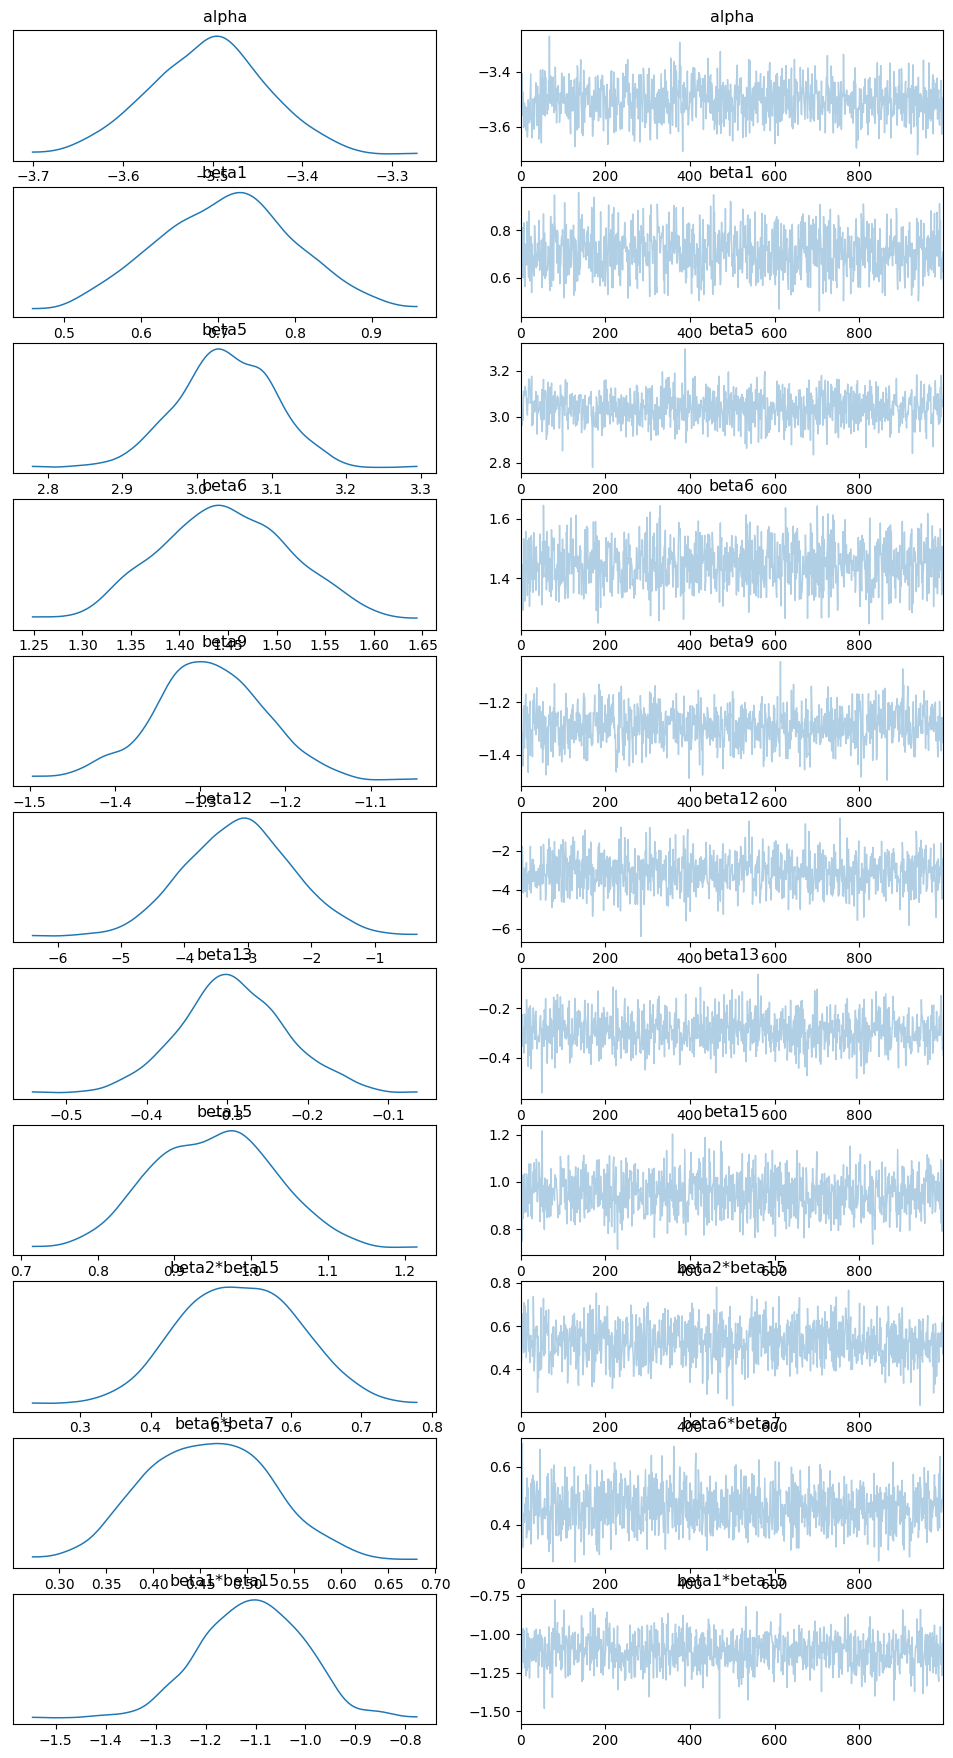

In [ ]:
az.plot_trace(glm_trace_advi5,
              var_names= ['alpha', 'beta1', 'beta5', 'beta6',
                           'beta9', 'beta12', 'beta13','beta15','beta2*beta15','beta6*beta7','beta1*beta15'])

# trace plots look good (fuzzy caterpillar distribution)

In [ ]:
az.summary(glm_trace_advi5,
           var_names= ['alpha', 'beta1', 'beta5', 'beta6',
                           'beta9', 'beta12', 'beta13','beta15','beta2*beta15','beta6*beta7','beta1*beta15'])
# ESS values greater than 400

Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        -3.504  0.065  -3.630   -3.385      0.002    0.002     925.0   
beta1         0.711  0.088   0.554    0.882      0.003    0.002     923.0   
beta5         3.038  0.064   2.929    3.166      0.002    0.001    1008.0   
beta6         1.447  0.071   1.319    1.576      0.002    0.002    1011.0   
beta9        -1.291  0.065  -1.415   -1.168      0.002    0.002     855.0   
beta12       -3.140  0.852  -4.656   -1.498      0.027    0.019    1008.0   
beta13       -0.292  0.065  -0.408   -0.160      0.002    0.001    1006.0   
beta15        0.951  0.080   0.803    1.094      0.003    0.002     973.0   
beta2*beta15  0.526  0.086   0.365    0.681      0.003    0.002     937.0   
beta6*beta7   0.458  0.068   0.344    0.590      0.002    0.001    1088.0   
beta1*beta15 -1.108  0.102  -1.293   -0.934      0.003    0.002     859.0   

              ess_tail  r_hat  
alpha            983.0    NaN  
beta1            983.0    NaN  
beta5            911.0    NaN  
beta6            818.0    NaN  
beta9            975.0    NaN  
beta12           983.0    NaN  
beta13           887.0    NaN  
beta15           894.0    NaN  
beta2*beta15     858.0    NaN  
beta6*beta7      794.0    NaN  
beta1*beta15     976.0    NaN

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

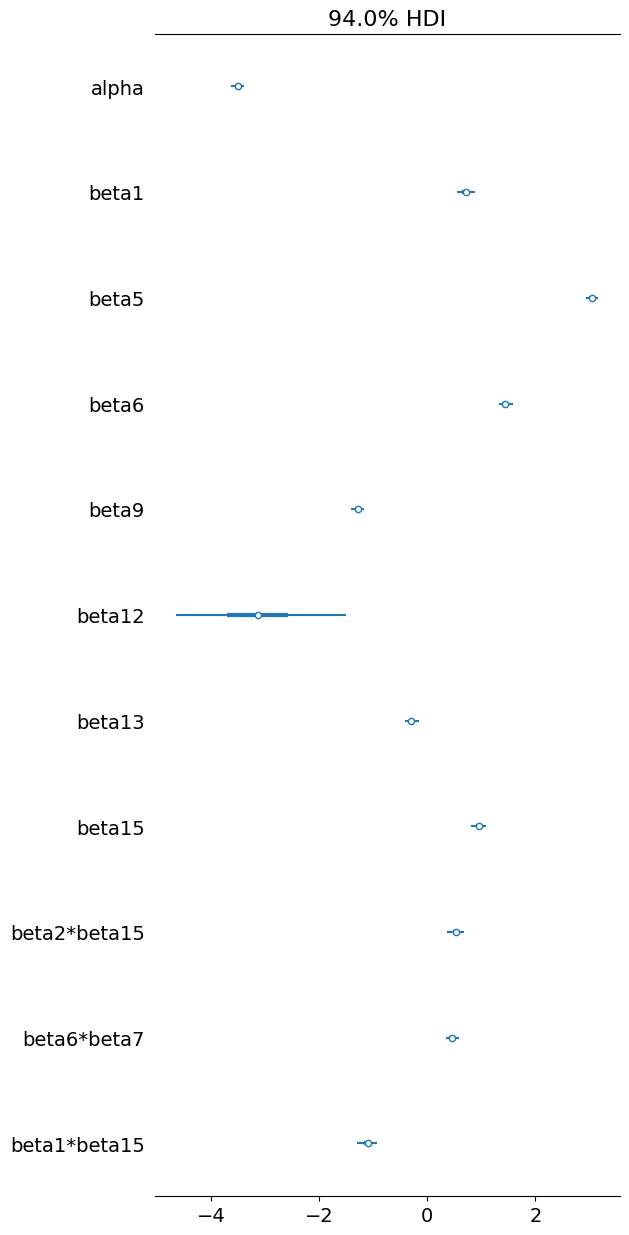

In [ ]:
az.plot_forest(glm_trace_advi5,
               var_names= ['alpha', 'beta1', 'beta5', 'beta6',
                           'beta9', 'beta12', 'beta13','beta15','beta2*beta15','beta6*beta7','beta1*beta15'])

In [ ]:
pp_advi5 = pm.sample_posterior_predictive(glm_trace_advi5,
                                          model = glm_model5,
                                          random_seed = random_seed,
                                          var_names= ['alpha', 'beta1', 'beta5', 'beta6',
                           'beta9', 'beta12', 'beta13','beta15','beta2*beta15','beta6*beta7','beta1*beta15'],
)
pp_advi15 = pm.sample_posterior_predictive(glm_trace_advi5,
                                          model = glm_model5,
                                          random_seed = random_seed)

<Axes: title={'center': 'Yl / Yl'}>

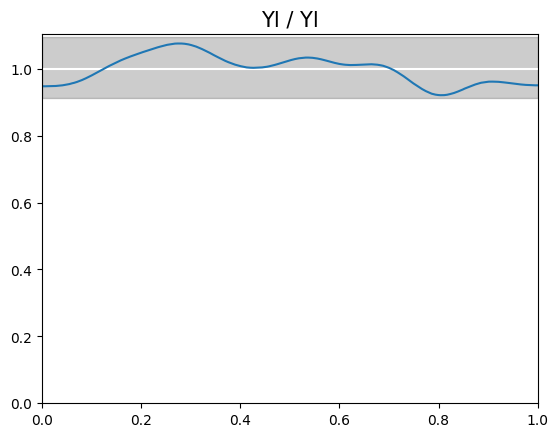

In [ ]:
#az.plot_bpv(pp_advi4)
az.plot_bpv(pp_advi15)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta5'}>],
       [<Axes: title={'center': 'beta6'}>,
        <Axes: title={'center': 'beta9'}>,
        <Axes: title={'center': 'beta12'}>],
       [<Axes: title={'center': 'beta13'}>,
        <Axes: title={'center': 'beta15'}>,
        <Axes: title={'center': 'beta2*beta15'}>],
       [<Axes: title={'center': 'beta6*beta7'}>,
        <Axes: title={'center': 'beta1*beta15'}>, <Axes: >]], dtype=object)

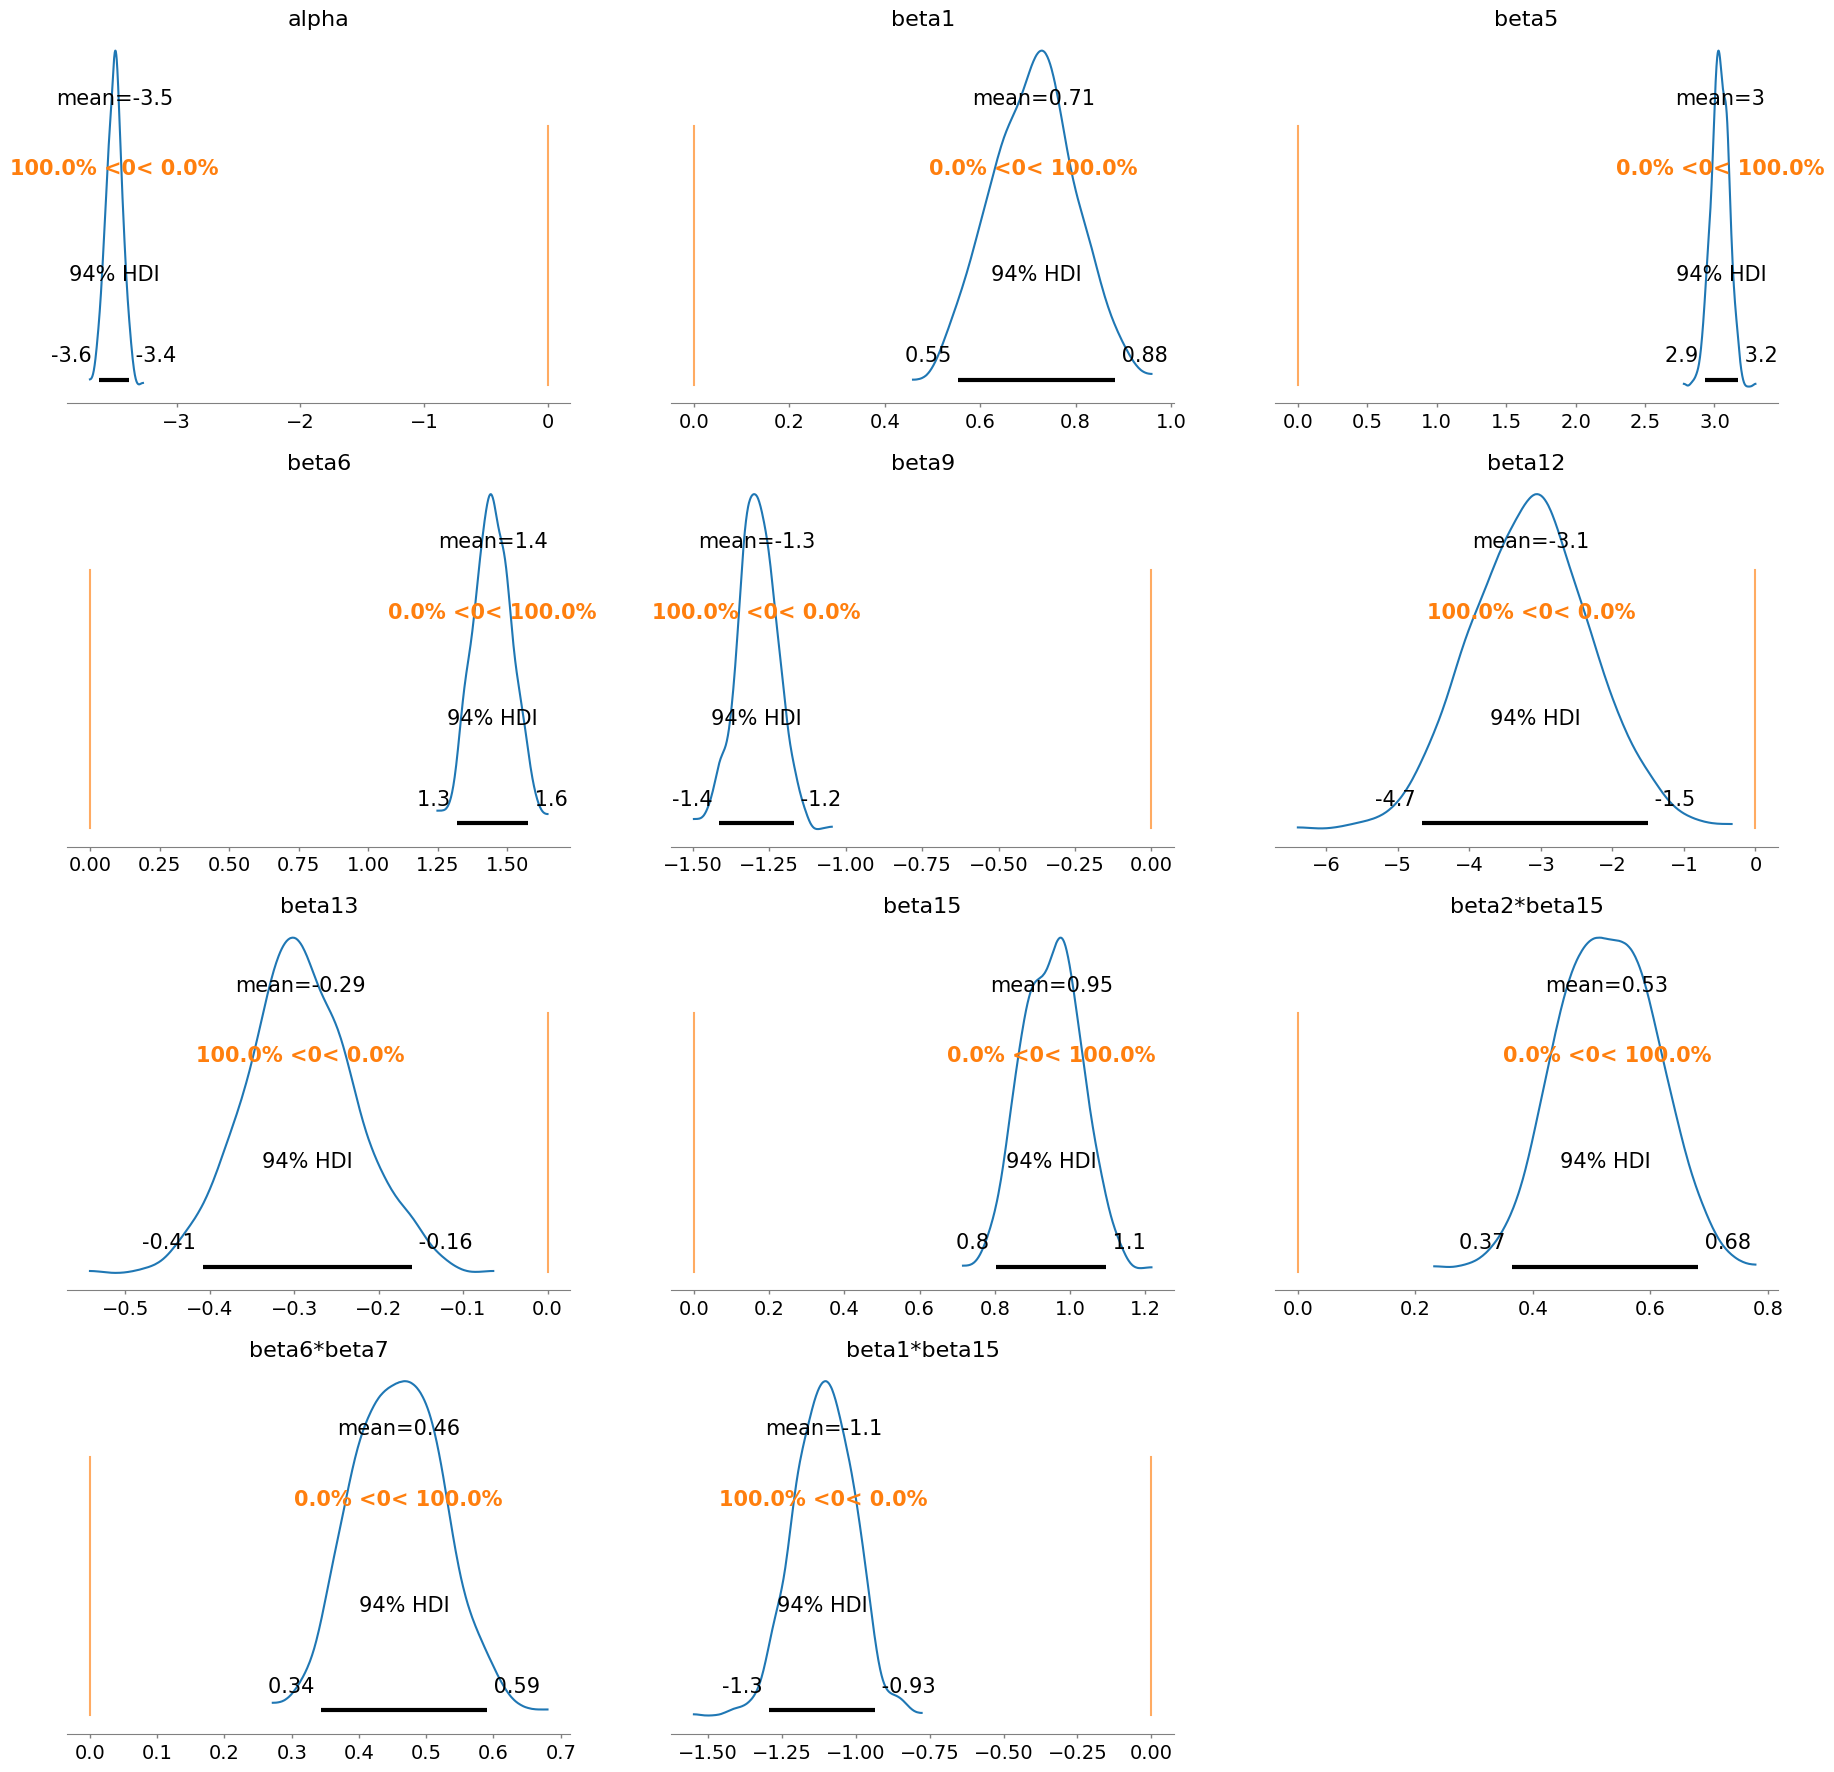

In [ ]:
az.plot_posterior(
    glm_trace_advi5,
    var_names=  ['alpha', 'beta1', 'beta5', 'beta6',
                           'beta9', 'beta12', 'beta13','beta15','beta2*beta15','beta6*beta7','beta1*beta15'],
    ref_val = 0,
)
# posterior plots all look good
# all betas in the model are significant

<Axes: xlabel='Yl / Yl'>

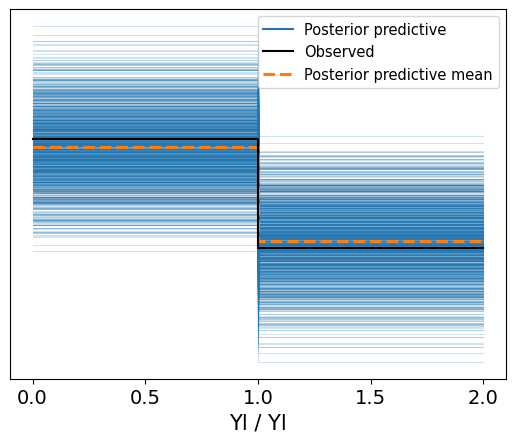

In [ ]:
#az.plot_ppc(pp_advi5)
az.plot_ppc(pp_advi15)

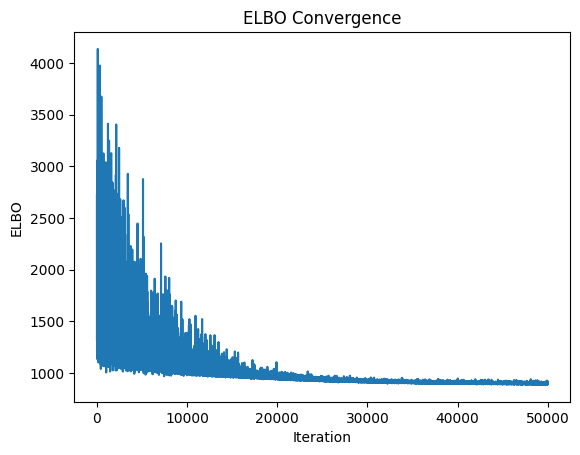

In [ ]:
plt.plot(advi_fit5.hist)
plt.xlabel('Iteration')
plt.ylabel('ELBO')
plt.title('ELBO Convergence')
plt.show()
# Elbo plot looks good and shows clear convergence

# Comparison of the models and their traces

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

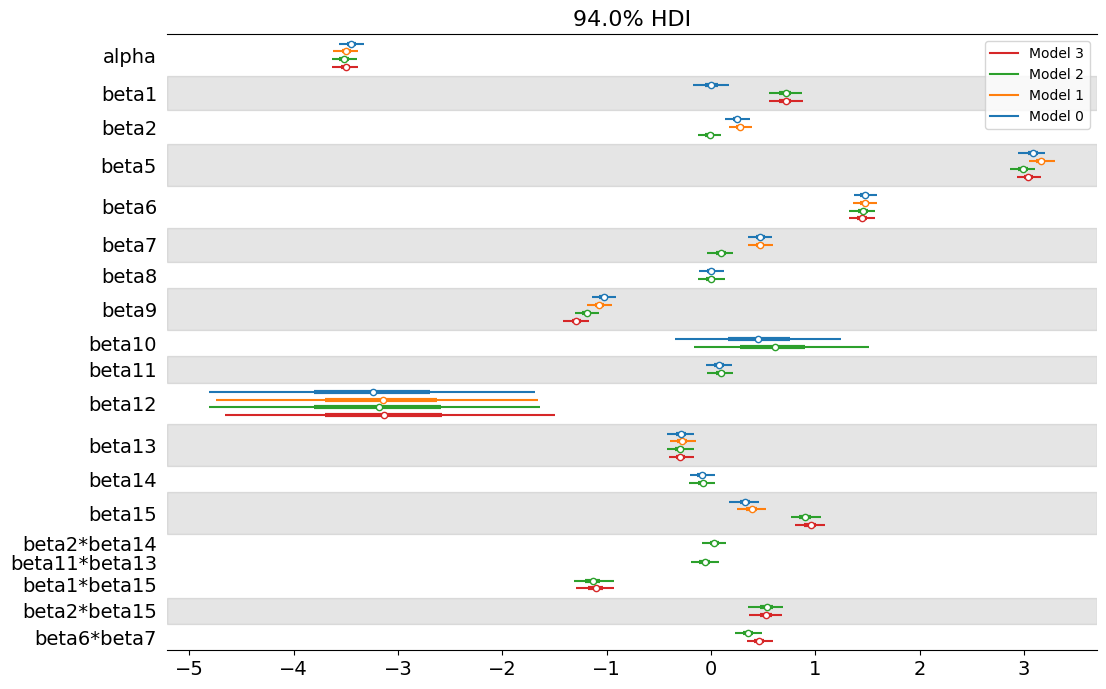

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

traces = [glm_trace_advi2, glm_trace_advi3, glm_trace_advi4, glm_trace_advi5]
az.plot_forest(traces,
               figsize = (12,8),
               var_names= ['alpha', 'beta1', 'beta2', 'beta5', 'beta6', 'beta7', 'beta8',
                           'beta9', 'beta10', 'beta11', 'beta12', 'beta13', 'beta14', 'beta15','beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7'])



## Posterior Predictions and Comparison

In [ ]:
def round_num(array):
    return [1 if x >= 0.5 else 0 for x in array]

In [ ]:
with glm_model2:
    pm.set_data({"X": X_test, "Y":Y_test})

    pp2 = pm.sample_posterior_predictive(
        glm_trace_advi2,
        var_names = ["Yl"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=False,
        random_seed = random_seed)

pred2 = pp2.predictions["Yl"].mean(dim =['chain','draw'])
pred2 = round_num(pred2)

In [ ]:
with glm_model3:
    pm.set_data({"X": X_test, "Y":Y_test})

    pp3 = pm.sample_posterior_predictive(
        glm_trace_advi3,
        var_names = ["Yl"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=False,
        random_seed = random_seed)

pred3 = pp3.predictions["Yl"].mean(dim =['chain','draw'])
pred3 = round_num(pred3)

In [ ]:
with glm_model4:
    pm.set_data({"X": X_test, "Y":Y_test})

    pp4 = pm.sample_posterior_predictive(
        glm_trace_advi4,
        var_names = ["Yl"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=False,
        random_seed = random_seed)

pred4 = pp4.predictions["Yl"].mean(dim =['chain','draw'])
pred4 = round_num(pred4)

In [ ]:
with glm_model5:
    pm.set_data({"X": X_test, "Y":Y_test})

    pp5 = pm.sample_posterior_predictive(
        glm_trace_advi5,
        var_names = ["Yl"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=False,
        random_seed = random_seed)

pred5 = pp5.predictions["Yl"].mean(dim =['chain','draw'])
pred5 = round_num(pred5)

In [ ]:
# List of all the models

# Model 1 - All betas excluding weight and height
# Model 2 - beta2, beta5, beta6, beta7, beta9, beta12, beta13, beta15
# Model 3 - All betas excluding weight and height, plus interaction terms 'beta2*beta14','beta11*beta13', 'beta1*beta15','beta2*beta15','beta6*beta7' (5 interactions)
# Model 4 - beta1, beta5, beta6, beta7, beta9, beta12, beta13, beta15, beta2*beta15*, beta6*beta7, beta1*beta15 (3 interactions)

In [ ]:
mse2 = mean_squared_error(pred2, Y_test)
mse3 = mean_squared_error(pred3, Y_test)
mse4 = mean_squared_error(pred4, Y_test)
mse5 = mean_squared_error(pred5, Y_test)

mse = [mse2, mse3, mse4, mse5]
print(mse)

[0.2553191489361702, 0.2647754137115839, 0.2222222222222222, 0.2553191489361702]


In [ ]:
acc2 = accuracy_score(pred2, Y_test)
acc3 = accuracy_score(pred3, Y_test)
acc4 = accuracy_score(pred4, Y_test)
acc5 = accuracy_score(pred5, Y_test)

acc = [acc2, acc3, acc4, acc5]

print(acc)

[0.7446808510638298, 0.735224586288416, 0.7777777777777778, 0.7446808510638298]


In [ ]:
prec2 = precision_score(pred2, Y_test)
prec3 = precision_score(pred3, Y_test)
prec4 = precision_score(pred4, Y_test)
prec5 = precision_score(pred5, Y_test)

prec = [prec2, prec3, prec4, prec5]

print(prec)

[0.7738693467336684, 0.7587939698492462, 0.7788944723618091, 0.7437185929648241]


In [ ]:
f2 = f1_score(pred2, Y_test)
f3 = f1_score(pred3, Y_test)
f4 = f1_score(pred4, Y_test)
f5 = f1_score(pred5, Y_test)

f = [f2, f3, f4, f5]

print(f)

[0.7403846153846154, 0.7294685990338164, 0.7673267326732673, 0.7326732673267328]


In [ ]:
ra2 = roc_auc_score(pred2, Y_test)
ra3 = roc_auc_score(pred3, Y_test)
ra4 = roc_auc_score(pred4, Y_test)
ra5 = roc_auc_score(pred5, Y_test)

ra = [ra2, ra3, ra4, ra5]

print(ra)

[0.7456154087065456, 0.735778175313059, 0.7771313492951443, 0.7440031326918773]


In [ ]:
models = ['Model 1','Model 2','Model 3','Model 4']
d = {'Model': models,'MSE': mse, 'Accuracy':acc, 'Precision':prec,'F Score':f, 'AUC': ra}

In [ ]:
results = pd.DataFrame(data = d)
results

Model       MSE  Accuracy  Precision   F Score       AUC
0  Model 1  0.255319  0.744681   0.773869  0.740385  0.745615
1  Model 2  0.264775  0.735225   0.758794  0.729469  0.735778
2  Model 3  0.222222  0.777778   0.778894  0.767327  0.777131
3  Model 4  0.255319  0.744681   0.743719  0.732673  0.744003

In [ ]:
# From the above, Model 3 has the best MSE, Accuracy, F score, and AUC. It is tied with models 1 and 2 for precison.

## Comparison of ROC Curves

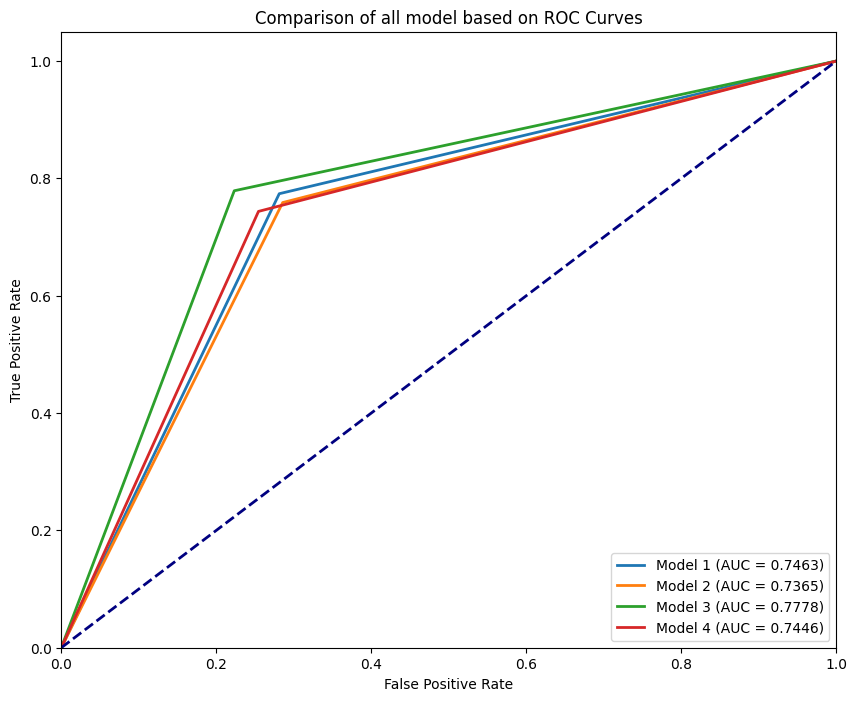

In [ ]:
predicted_probs = {
    "Model 1": pred2,
    "Model 2": pred3,
    "Model 3": pred4,
    "Model 4": pred5
}

plt.figure(figsize=(10, 8))

for model_name, y_probs in predicted_probs.items():
    fpr, tpr, _ = roc_curve(Y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of all model based on ROC Curves')
plt.legend(loc="lower right")

plt.show()